In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from pickle import load
from pickle import dump
from myTools import *
import datetime
import warnings


# Bagging
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

# Random forest
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Adaboost
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier

# Gradient boost
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.ensemble import IsolationForest
#IsolationForest(contamination=0.01)

In [3]:
dfApplication = load(open('dfApplicationLight.pkl','rb'))

# Optimisation des paramètres

In [4]:
def evaluate(model, title): 
        
    return evaluateRocPrCurves(dfApplication, 
                                target='TARGET', 
                                identifier='SK_ID_CURR', 
                                model=model,
                                display_plot=False,
                                title_plot = title,
                                cv=3)

In [5]:
results = []

# Random forests

## max_depth

### sklearn random forest

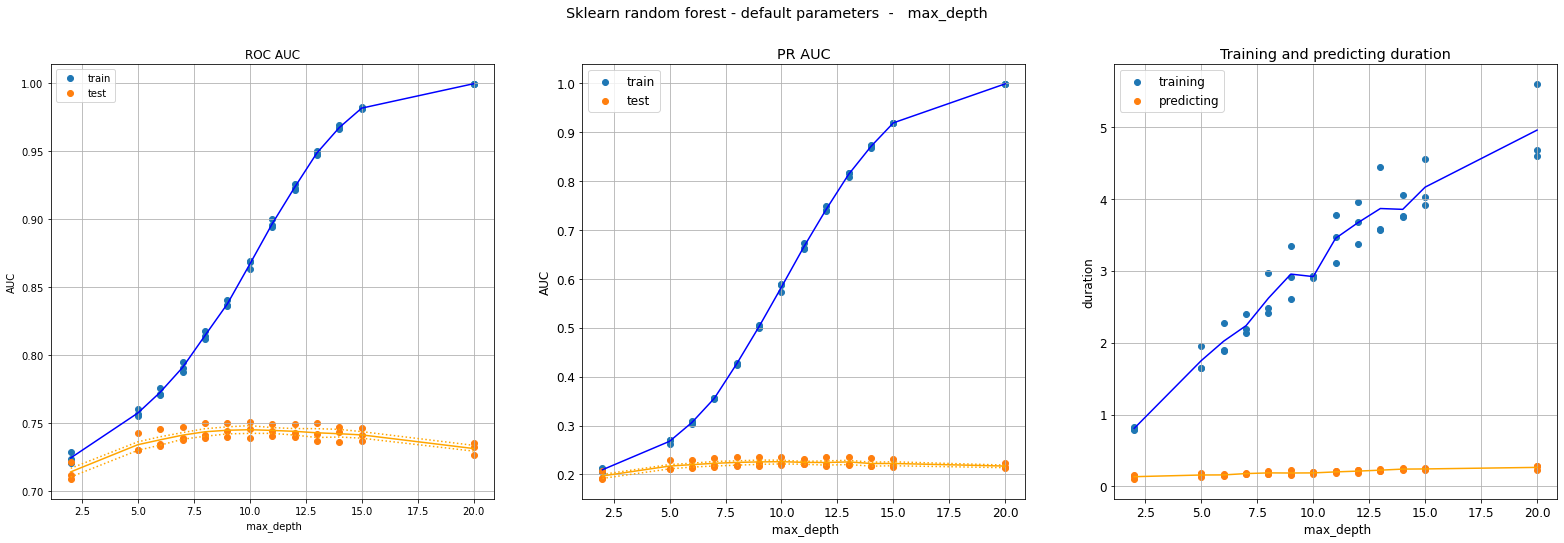

In [9]:
results_tmp = []
lst = [2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20]
for param_value in lst:
    model = RandomForestClassifier(max_depth=param_value, n_jobs=-1)
    title = 'Sklearn random forest - default parameters |  max_depth = ' + str(param_value)
    res = evaluate(model=model, title = title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### imbalanced random forest

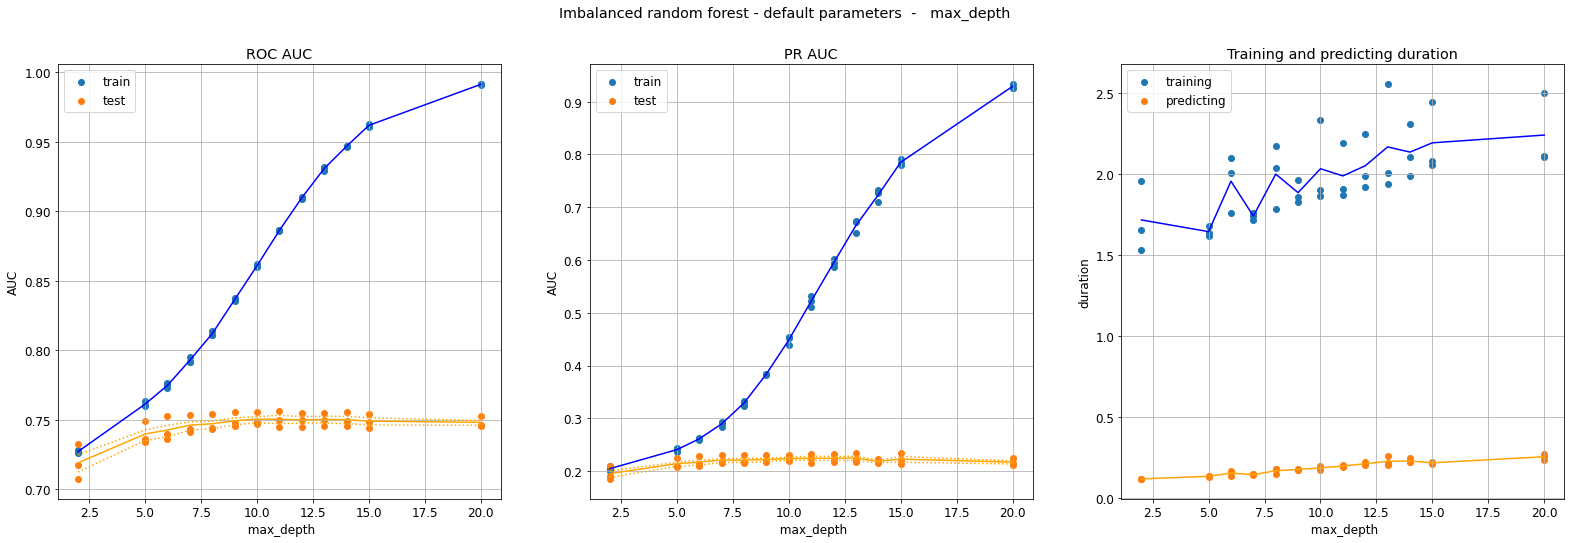

In [11]:
results_tmp = []
lst = [2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20]
for param_value in lst:
    model = BalancedRandomForestClassifier(max_depth=param_value, n_jobs=-1)
    title = 'Imbalanced random forest - default parameters |  max_depth = ' + str(param_value)
    res = evaluate(model=model, title = title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## max_features

### sklearn random forest

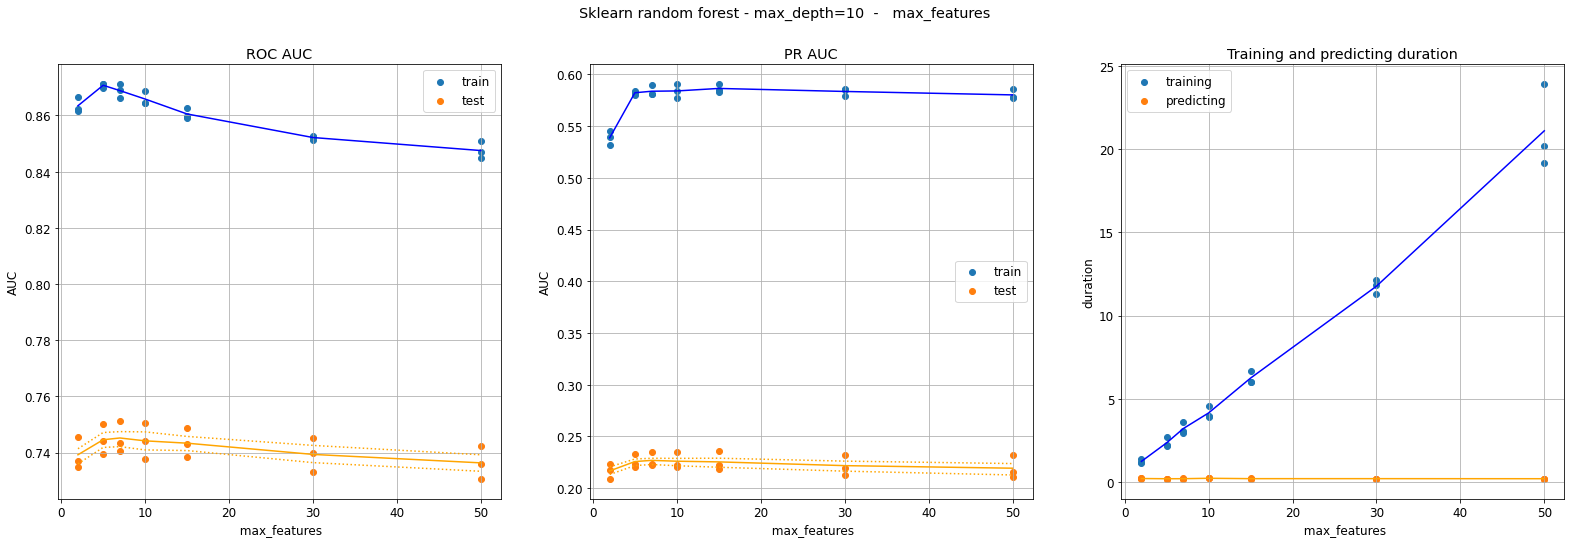

In [12]:
results_tmp = []
lst = [2, 5, 7, 10, 15, 30, 50]
for param_value in lst:
    model = RandomForestClassifier(max_depth=10, max_features=param_value, n_jobs=-1)
    title = 'Sklearn random forest - max_depth=10 |  max_features = ' + str(param_value)
    res = evaluate(model=model, title = title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### Imbalanced random forest

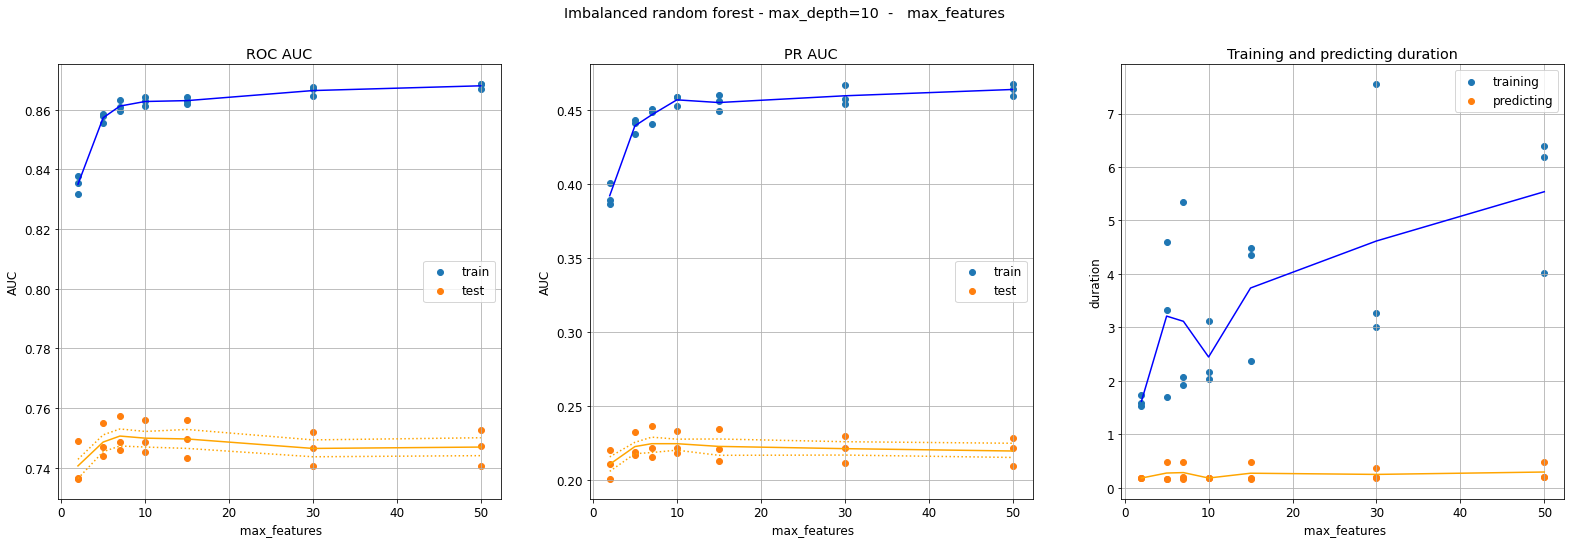

In [14]:
results_tmp = []
lst = [2, 5, 7, 10, 15, 30, 50]
for param_value in lst:
    model = BalancedRandomForestClassifier(max_depth=10, max_features=param_value, n_jobs=-1)
    title = 'Imbalanced random forest - max_depth=10 |  max_features = ' + str(param_value)
    res = evaluate(model=model, title = title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## min_samples_leaf

### sklearn random forest

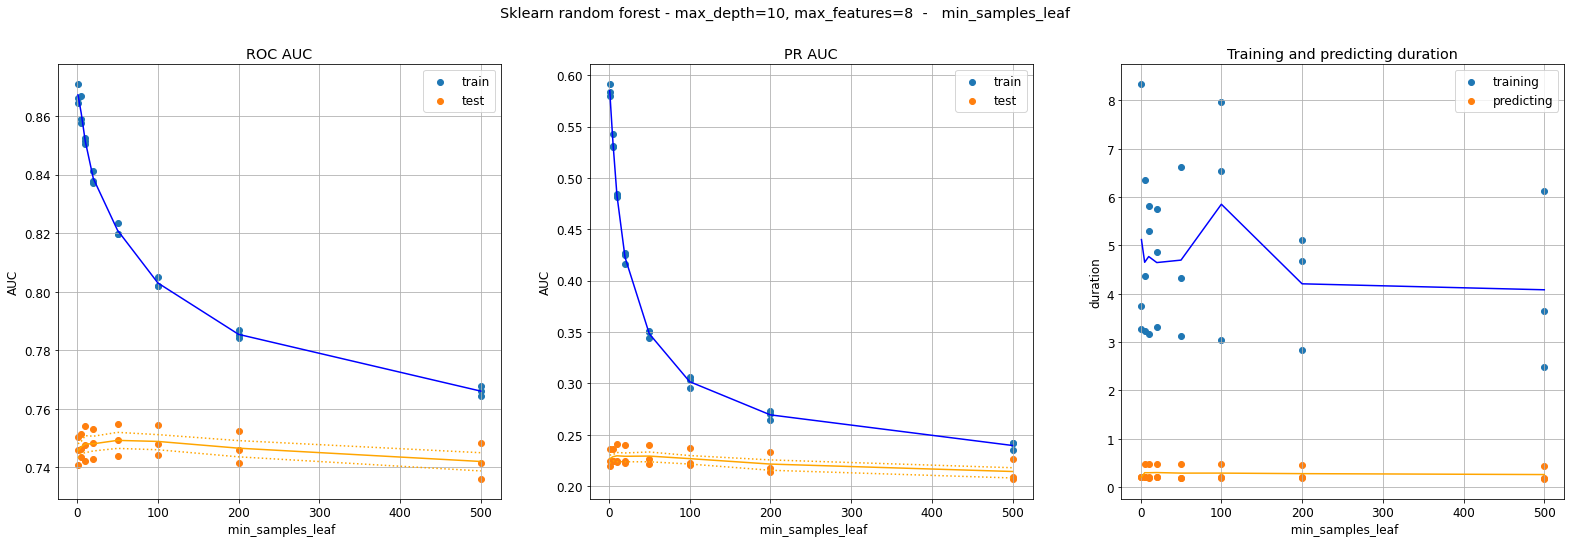

In [17]:
results_tmp = []
lst = [1, 5, 10, 20, 50, 100, 200, 500]
for param_value in lst:
    model = RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=param_value, n_jobs=-1)
    title = 'Sklearn random forest - max_depth=10, max_features=8 |  min_samples_leaf = ' + str(param_value)
    res = evaluate(model=model, title = title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### imbalanced random forest

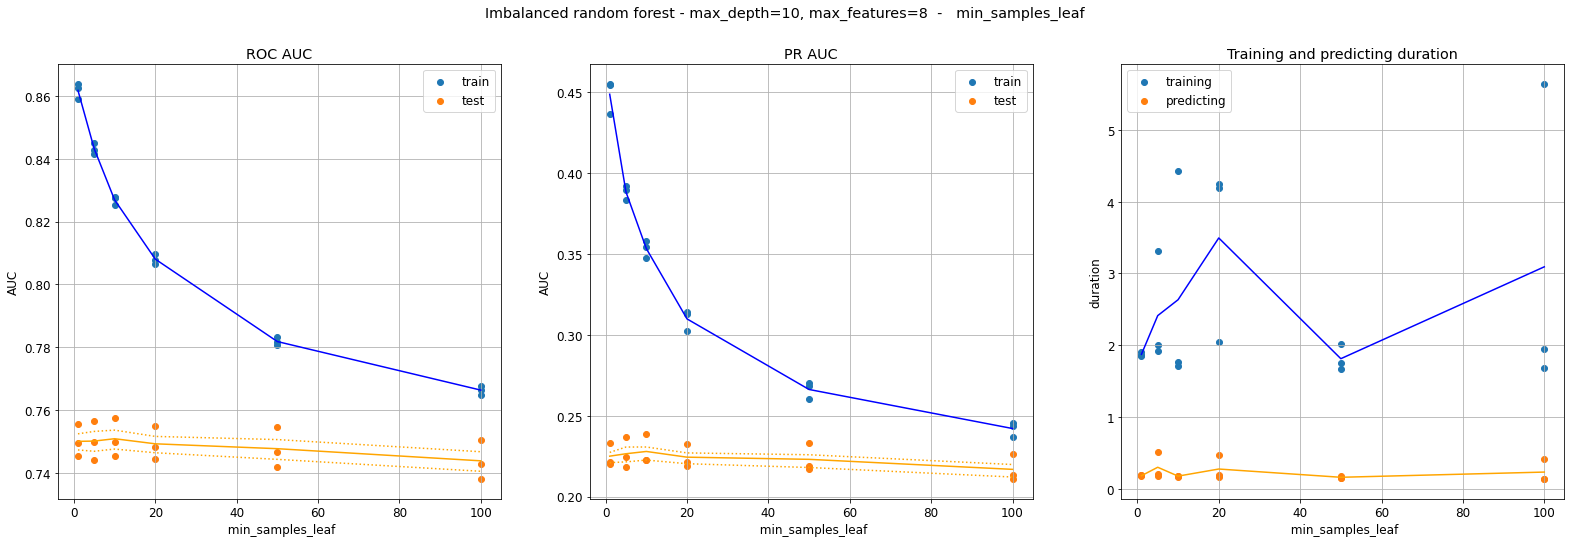

In [18]:
results_tmp = []
lst = [1, 5, 10, 20, 50, 100]
for param_value in lst:
    model = BalancedRandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=param_value, n_jobs=-1)
    title = 'Imbalanced random forest - max_depth=10, max_features=8 |  min_samples_leaf = ' + str(param_value)
    res = evaluate(model=model, title = title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## min_samples_split

### sklearn random forest

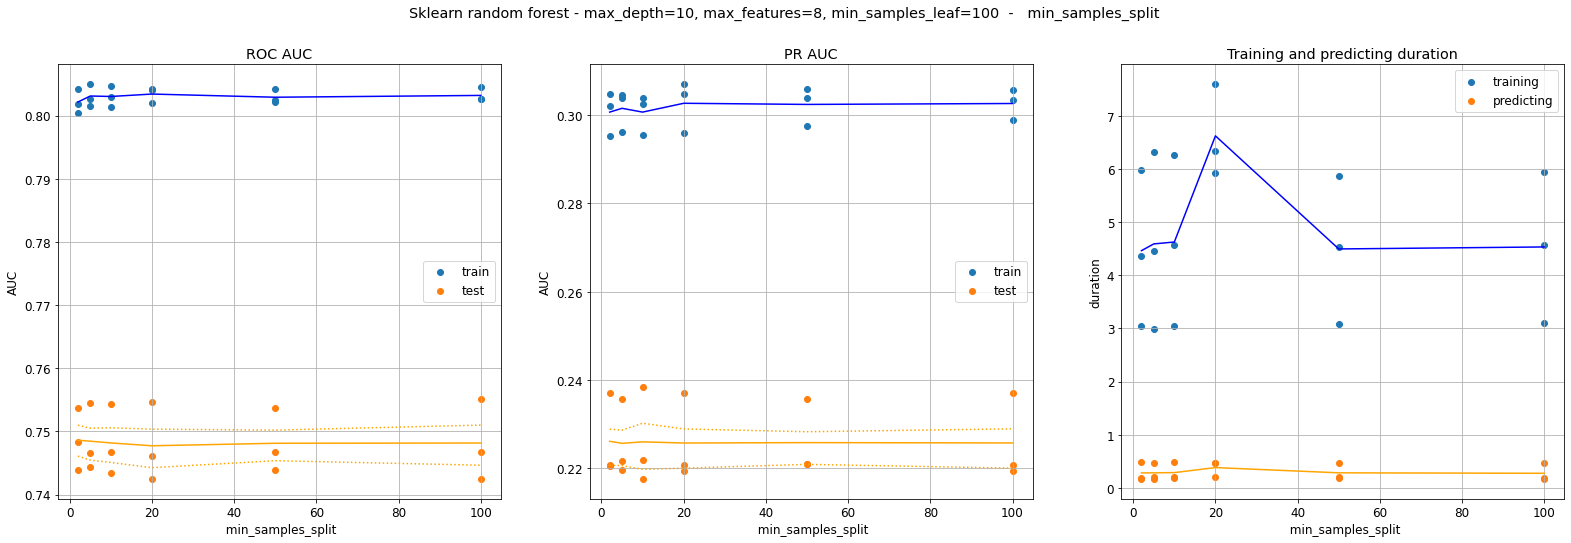

In [19]:
results_tmp = []
lst = [2, 5, 10, 20, 50, 100]
for param_value in lst:
    model = RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=param_value, n_jobs=-1)
    title = 'Sklearn random forest - max_depth=10, max_features=8, min_samples_leaf=100 |  min_samples_split = ' + str(param_value)
    res = evaluate(model=model, title = title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### Imbalanced random forest

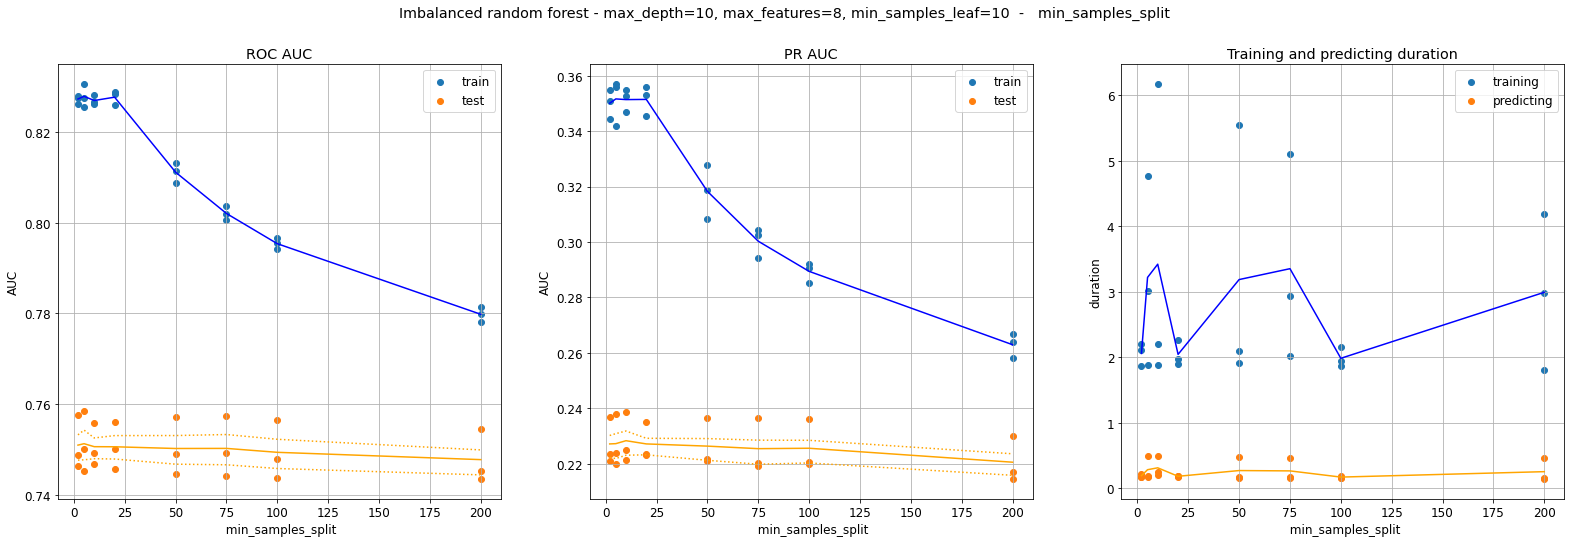

In [20]:
results_tmp = []
lst = [2, 5, 10, 20, 50, 75, 100, 200]
for param_value in lst:
    model = BalancedRandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=10, min_samples_split=param_value, n_jobs=-1)
    title = 'Imbalanced random forest - max_depth=10, max_features=8, min_samples_leaf=10 |  min_samples_split = ' + str(param_value)
    res = evaluate(model=model, title = title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## Criterion

### sklearn random forest

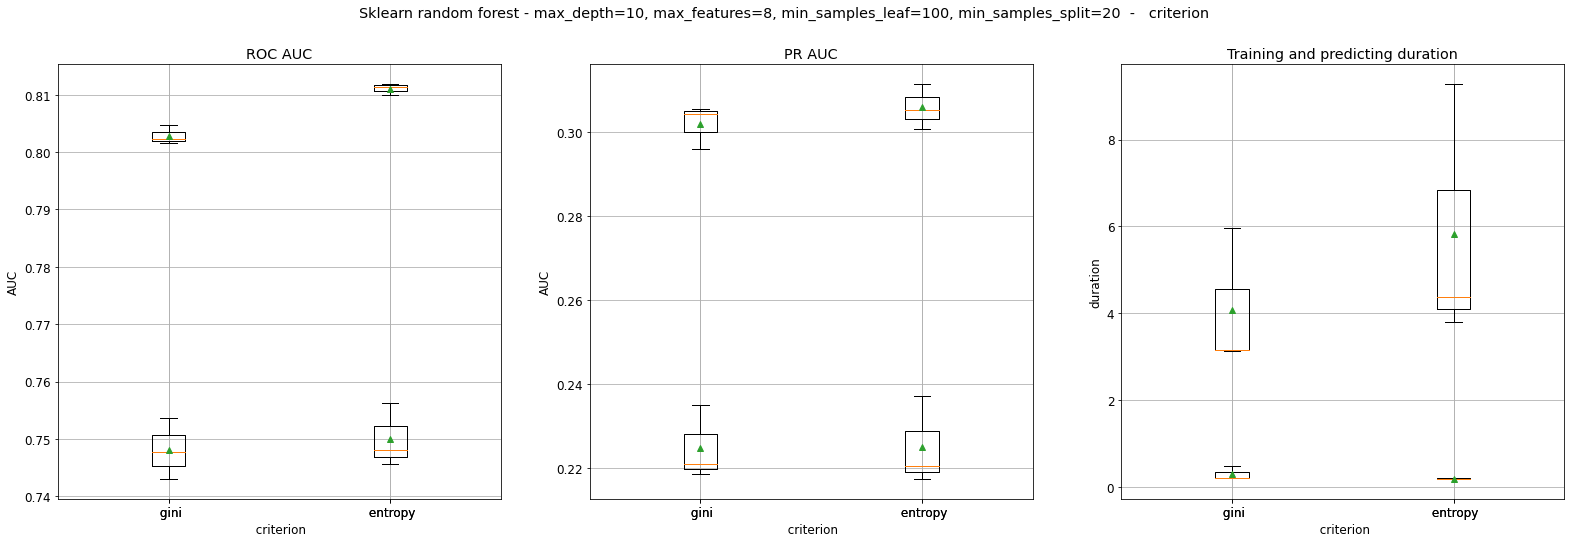

In [21]:
results_tmp = []

model = RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='gini', n_jobs=-1)
title = 'Sklearn random forest - max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20 |  criterion = gini'
res = evaluate(model=model, title = title)
results_tmp.append(res)

model = RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='entropy', n_jobs=-1)
title = 'Sklearn random forest - max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20 |  criterion = entropy'
res = evaluate(model=model, title = title)
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

### Imbalanced random forest

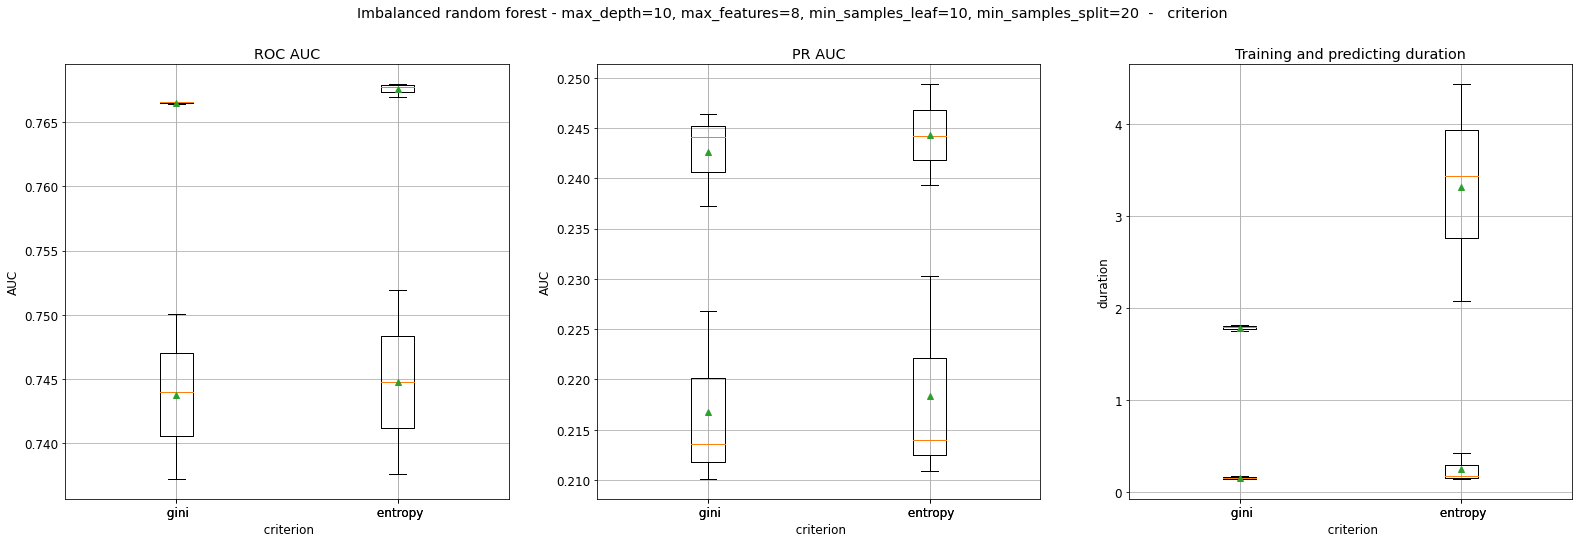

In [23]:
results_tmp = []

model = BalancedRandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='gini', n_jobs=-1)
title = 'Imbalanced random forest - max_depth=10, max_features=8, min_samples_leaf=10, min_samples_split=20 |  criterion = gini'
res = evaluate(model=model, title = title)
results_tmp.append(res)

model = BalancedRandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='entropy', n_jobs=-1)
title = 'Imbalanced random forest - max_depth=10, max_features=8, min_samples_leaf=10, min_samples_split=20 |  criterion = entropy'
res = evaluate(model=model, title = title)
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

## class_weight

### sklearn random forest

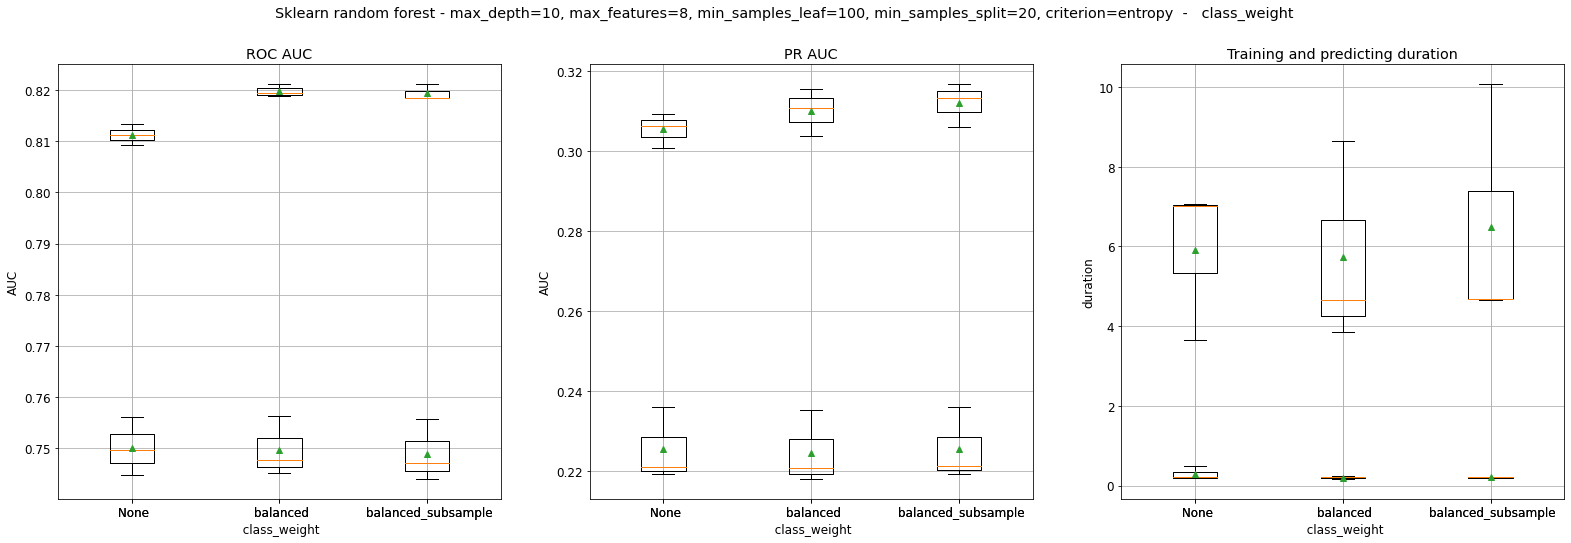

In [24]:
results_tmp = []

model = RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='entropy', n_jobs=-1)
title = 'Sklearn random forest - max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion=entropy |  class_weight = None'
res = evaluate(model=model, title = title)
results_tmp.append(res)

model = RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='entropy', class_weight = 'balanced', n_jobs=-1)
title = 'Sklearn random forest - max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion=entropy |  class_weight = balanced'
res = evaluate(model=model, title = title)
results_tmp.append(res)

model = RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='entropy', class_weight = 'balanced_subsample', n_jobs=-1)
title = 'Sklearn random forest - max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion=entropy |  class_weight = balanced_subsample'
res = evaluate(model=model, title = title)
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

### Imbalanced random forest

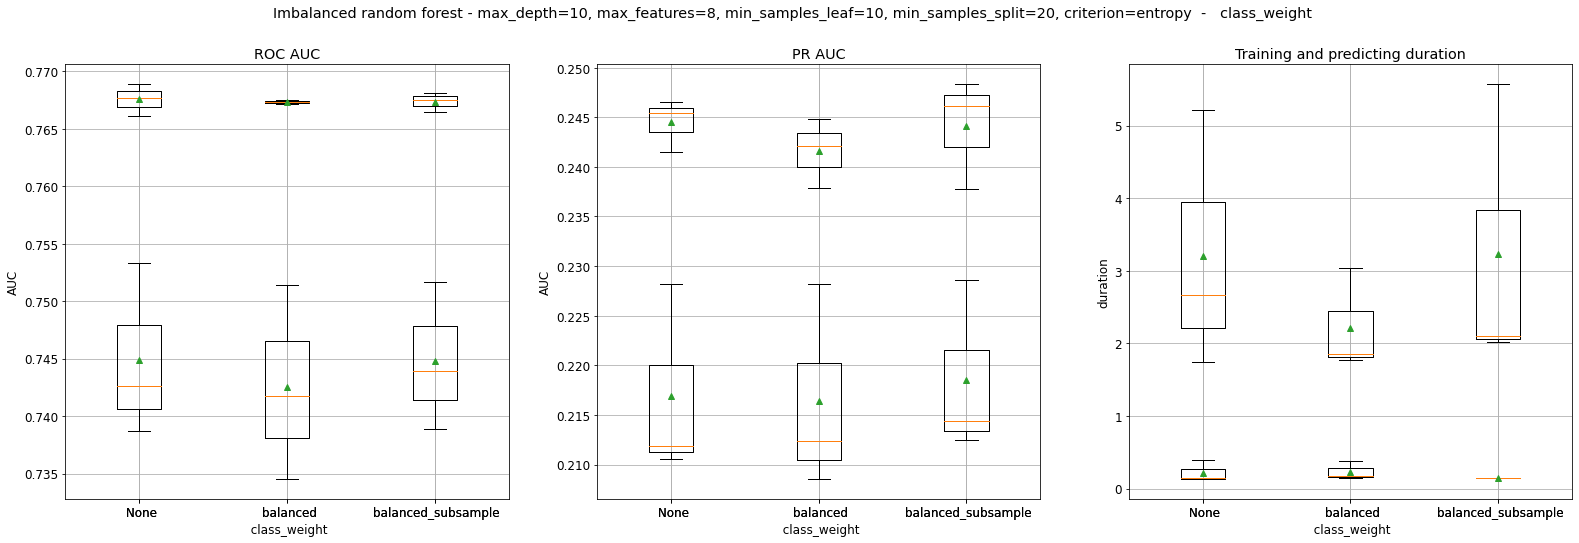

In [25]:
results_tmp = []

model = BalancedRandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='entropy', n_jobs=-1)
title = 'Imbalanced random forest - max_depth=10, max_features=8, min_samples_leaf=10, min_samples_split=20, criterion=entropy |  class_weight = None'
res = evaluate(model=model, title = title)
results_tmp.append(res)

model = BalancedRandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='entropy', class_weight = 'balanced', n_jobs=-1)
title = 'Imbalanced random forest - max_depth=10, max_features=8, min_samples_leaf=10, min_samples_split=20, criterion=entropy |  class_weight = balanced'
res = evaluate(model=model, title = title)
results_tmp.append(res)

model = BalancedRandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='entropy', class_weight = 'balanced_subsample', n_jobs=-1)
title = 'Imbalanced random forest - max_depth=10, max_features=8, min_samples_leaf=10, min_samples_split=20, criterion=entropy |  class_weight = balanced_subsample'
res = evaluate(model=model, title = title)
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

## Bootstrap

### sklearn random forest

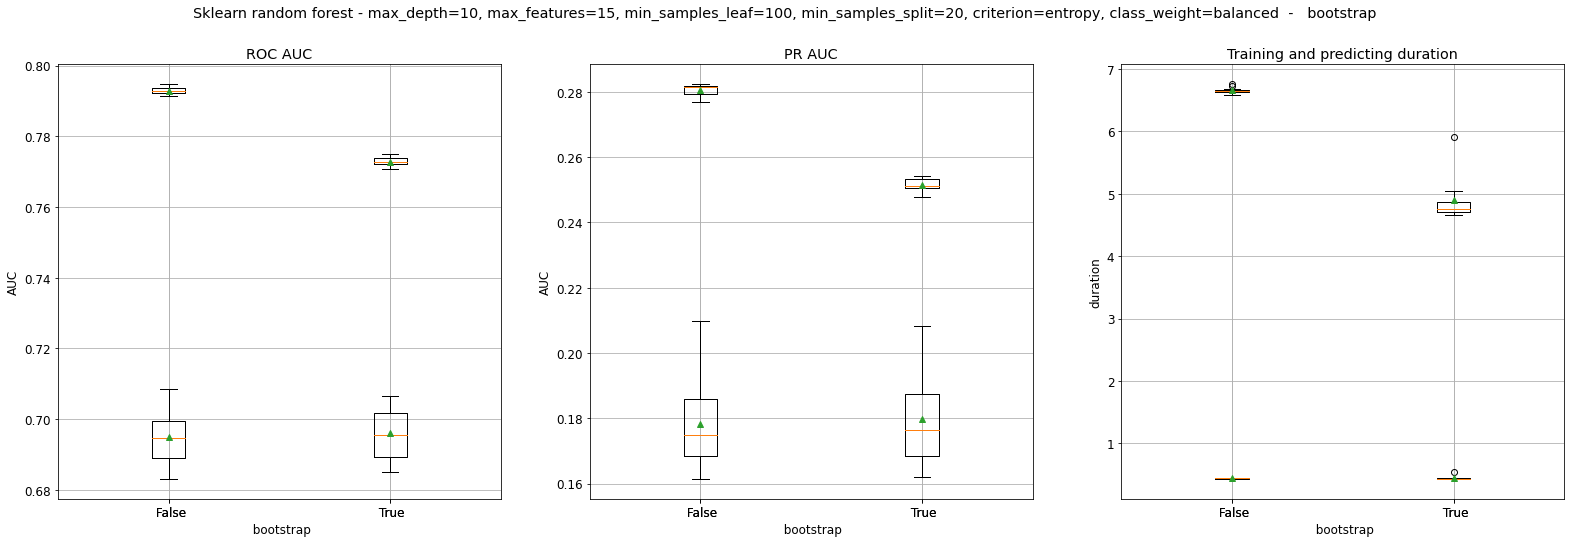

In [46]:
results_tmp = []

model = RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=False, n_jobs=-1)
title = 'Sklearn random forest - max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion=entropy, class_weight=balanced |  bootstrap = False'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

model = RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, n_jobs=-1)
title = 'Sklearn random forest - max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion=entropy, class_weight=balanced |  bootstrap = True'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

### Imbalanced random forest

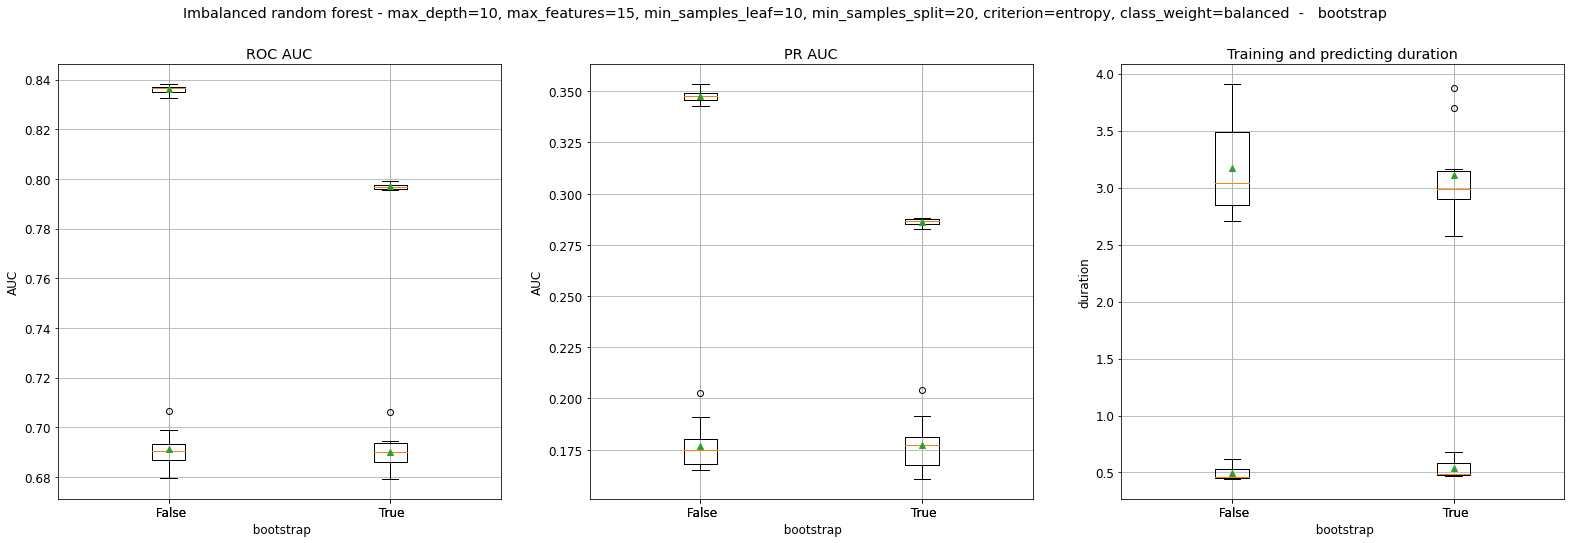

In [47]:
results_tmp = []

model = BalancedRandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=10, min_samples_split=20, criterion='entropy',class_weight = 'balanced_subsample', bootstrap=False, n_jobs=-1)
title = 'Imbalanced random forest - max_depth=10, max_features=8, min_samples_leaf=10, min_samples_split=20, criterion=entropy, class_weight=balanced_subsample |  bootstrap = False'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

model = BalancedRandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=10, min_samples_split=20, criterion='entropy',class_weight = 'balanced_subsample', bootstrap=True, n_jobs=-1)
title = 'Imbalanced random forest - max_depth=10, max_features=8, min_samples_leaf=10, min_samples_split=20, criterion=entropy, class_weight=balanced_subsample |  bootstrap = True'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

## max_samples

### sklearn random forest

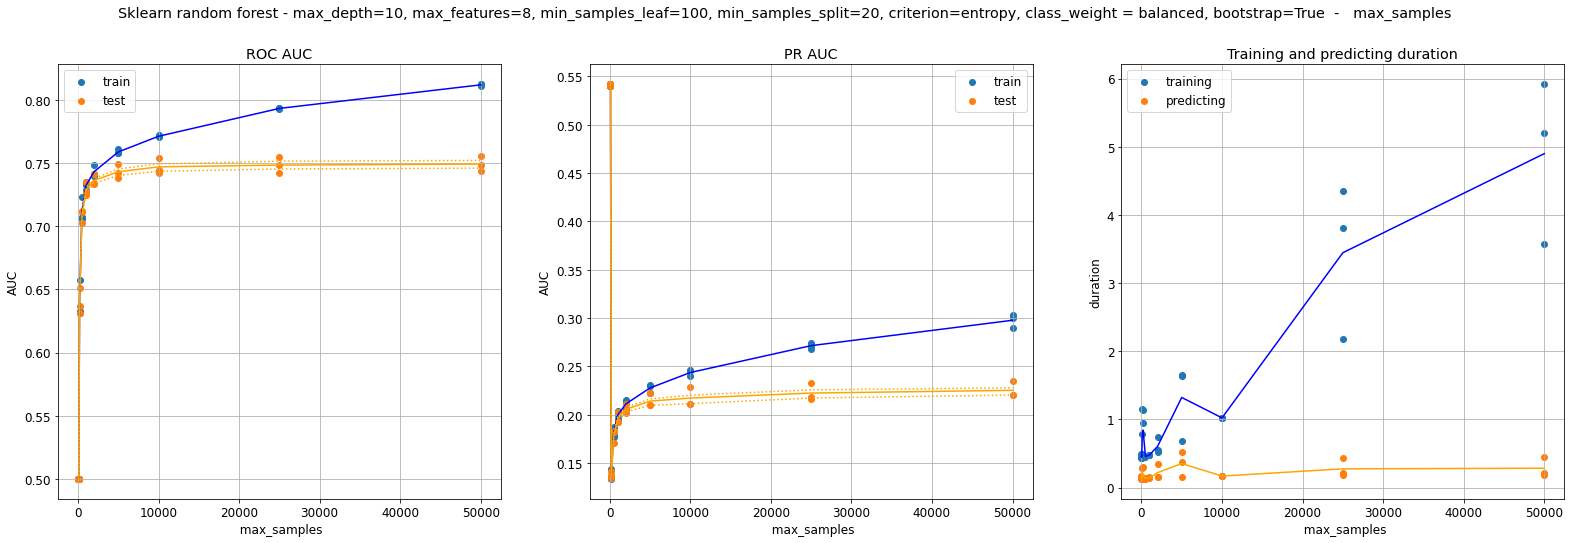

In [26]:
results_tmp = []
lst = [2, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 25000, 50000]
for param_value in lst:
    model = RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=param_value, n_jobs=-1)
    title = 'Sklearn random forest - max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion=entropy, class_weight = balanced, bootstrap=True |  max_samples = ' + str(param_value)
    res = evaluate(model=model, title = title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### Imbalanced random forest

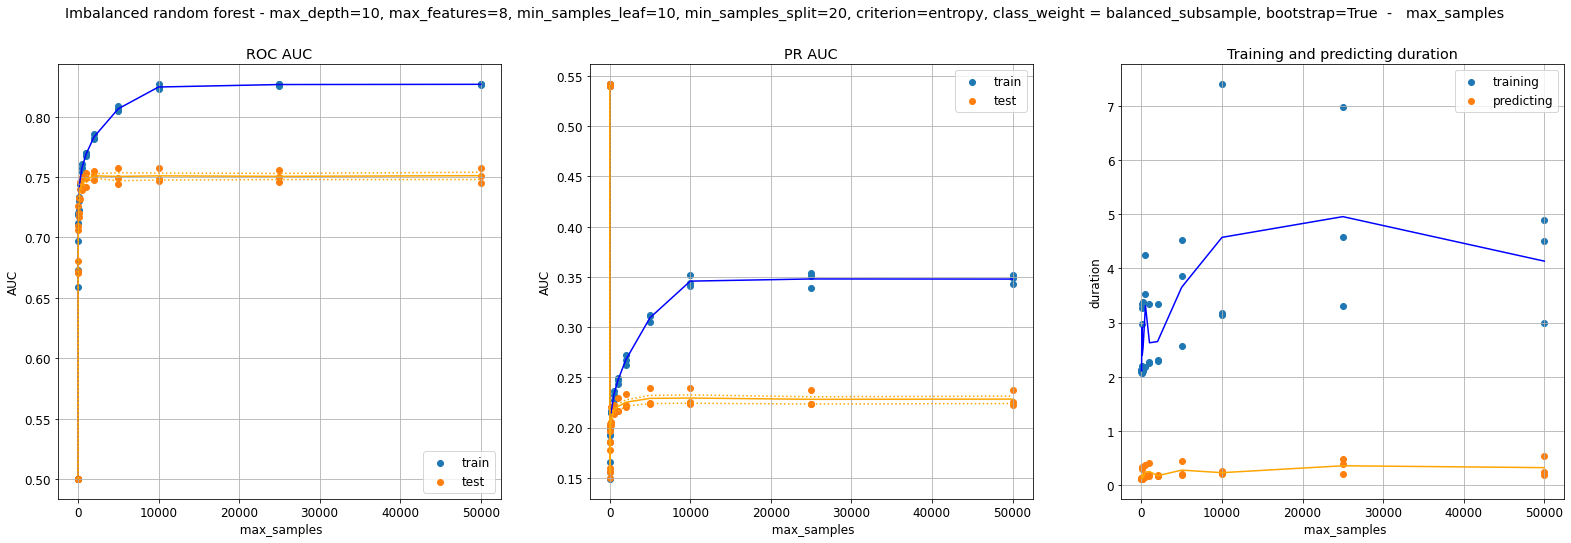

In [27]:
results_tmp = []
lst = [2, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 25000, 50000]
for param_value in lst:
    model = BalancedRandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=10, min_samples_split=20, criterion='entropy',class_weight = 'balanced_subsample', bootstrap=True, max_samples=param_value, n_jobs=-1)
    title = 'Imbalanced random forest - max_depth=10, max_features=8, min_samples_leaf=10, min_samples_split=20, criterion=entropy, class_weight = balanced_subsample, bootstrap=True |  max_samples = ' + str(param_value)
    res = evaluate(model=model, title = title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## max_leaf_nodes

### sklearn random forest

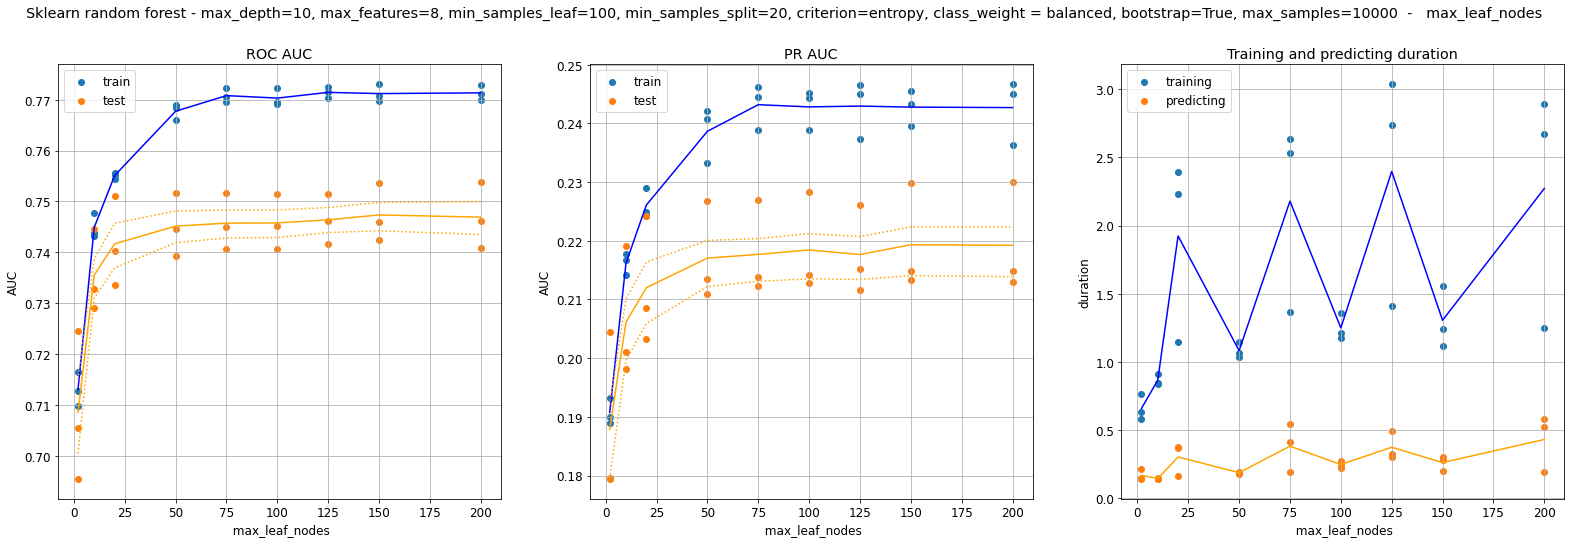

In [28]:
results_tmp = []
lst = [2, 10, 20, 50, 75, 100, 125, 150, 200]
for param_value in lst:
    model = RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=10000, max_leaf_nodes=param_value, n_jobs=-1)
    title = 'Sklearn random forest - max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion=entropy, class_weight = balanced, bootstrap=True, max_samples=10000 |  max_leaf_nodes = ' + str(param_value)
    res = evaluate(model=model, title = title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### Imbalanced random forest

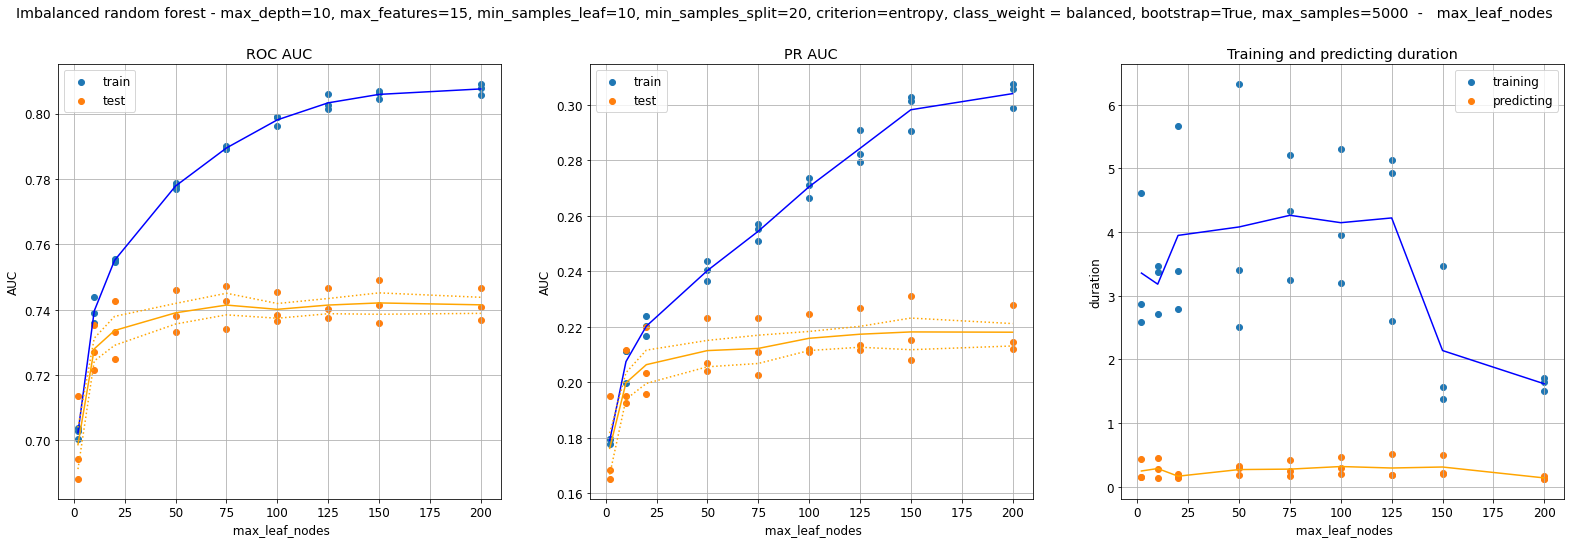

In [29]:
results_tmp = []
lst = [2, 10, 20, 50, 75, 100, 125, 150, 200]
for param_value in lst:
    model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=5000, max_leaf_nodes=param_value, n_jobs=-1)
    title = 'Imbalanced random forest - max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion=entropy, class_weight = balanced, bootstrap=True, max_samples=5000 |  max_leaf_nodes = ' + str(param_value)
    res = evaluate(model=model, title = title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## n_estimators

### sklearn random forest

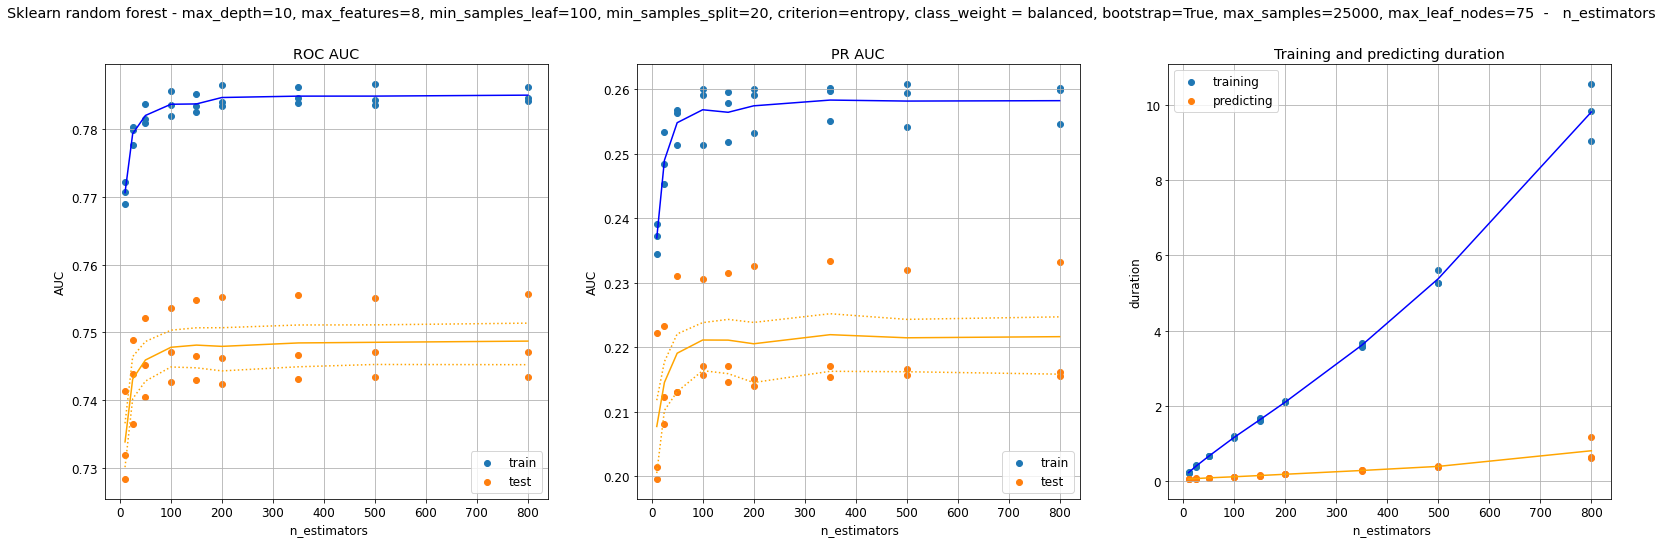

In [32]:
results_tmp = []
lst = [10, 25, 50, 100, 150, 200, 350, 500, 800]
for param_value in lst:
    model = RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=25000, max_leaf_nodes=75, n_estimators=param_value, n_jobs=-1)
    title = 'Sklearn random forest - max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion=entropy, class_weight = balanced, bootstrap=True, max_samples=25000, max_leaf_nodes=75 |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title = title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

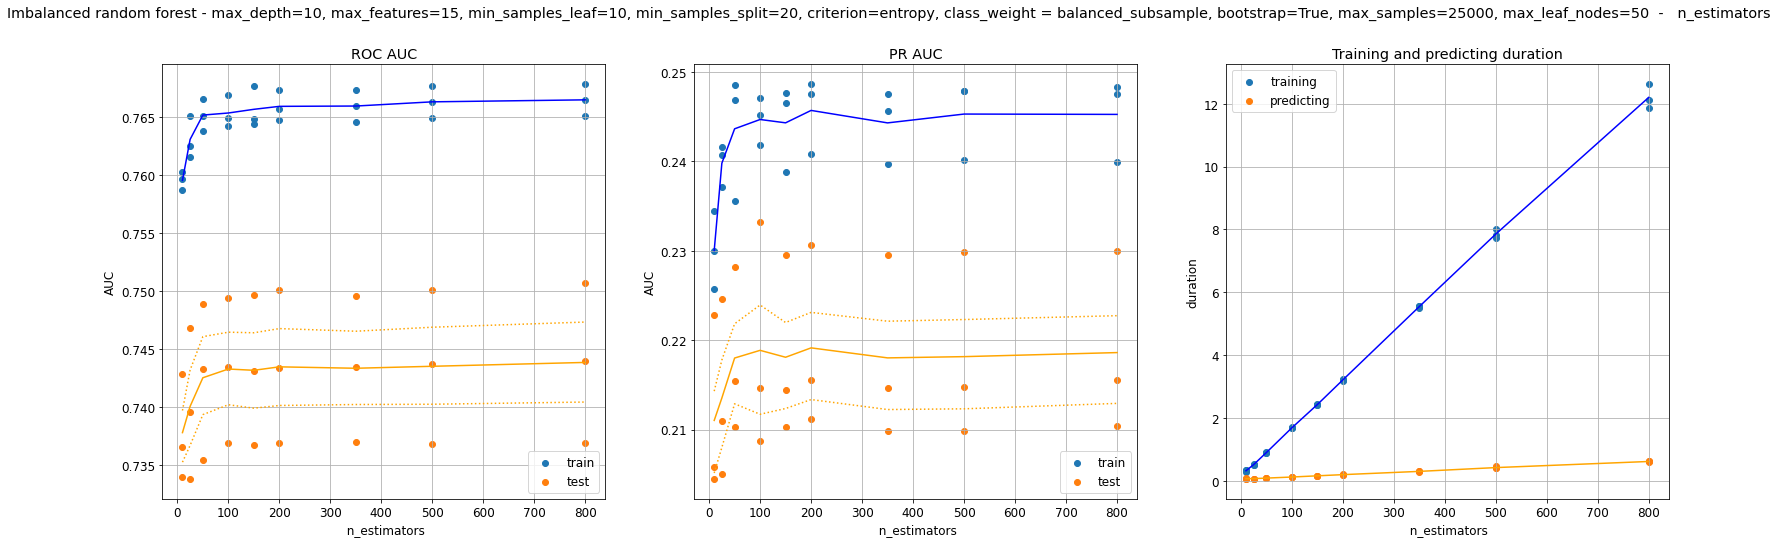

In [33]:
results_tmp = []
lst = [10, 25, 50, 100, 150, 200, 350, 500, 800]
for param_value in lst:
    model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced_subsample', bootstrap=True, max_samples=25000, max_leaf_nodes=50, n_estimators=param_value, n_jobs=-1)
    title = 'Imbalanced random forest - max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion=entropy, class_weight = balanced_subsample, bootstrap=True, max_samples=25000, max_leaf_nodes=50 |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title = title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## Métriques finales random forest

In [35]:
bestmetricsRF = []

model = RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=25000, max_leaf_nodes=150, n_estimators=200, n_jobs=-1)
title = 'sklearn random forest'
bestmetricsRF.append(evaluate(model, title))
         
model = BalancedRandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=10, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=25000, max_leaf_nodes=150, n_estimators=200, n_jobs=-1)
title = 'imbalanced random forest'
bestmetricsRF.append(evaluate(model, title))
         
pd.concat(bestmetricsRF).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

,title,roc_auc_train,roc_auc_test,pr_auc_train,pr_auc_test,time_train,time_pred,nb_feat,nb_train,timestamp
0,sklearn random forest,0.794306,0.749758,0.272503,0.224018,2.227520,0.189480,50.0,66666.666667,1.625560e+09
1,imbalanced random forest,0.829136,0.743032,0.314029,0.220563,2.585513,0.191831,50.0,66666.666667,1.625560e+09


# Gradient boosting

## Max depth

### sklearn gradient boosting

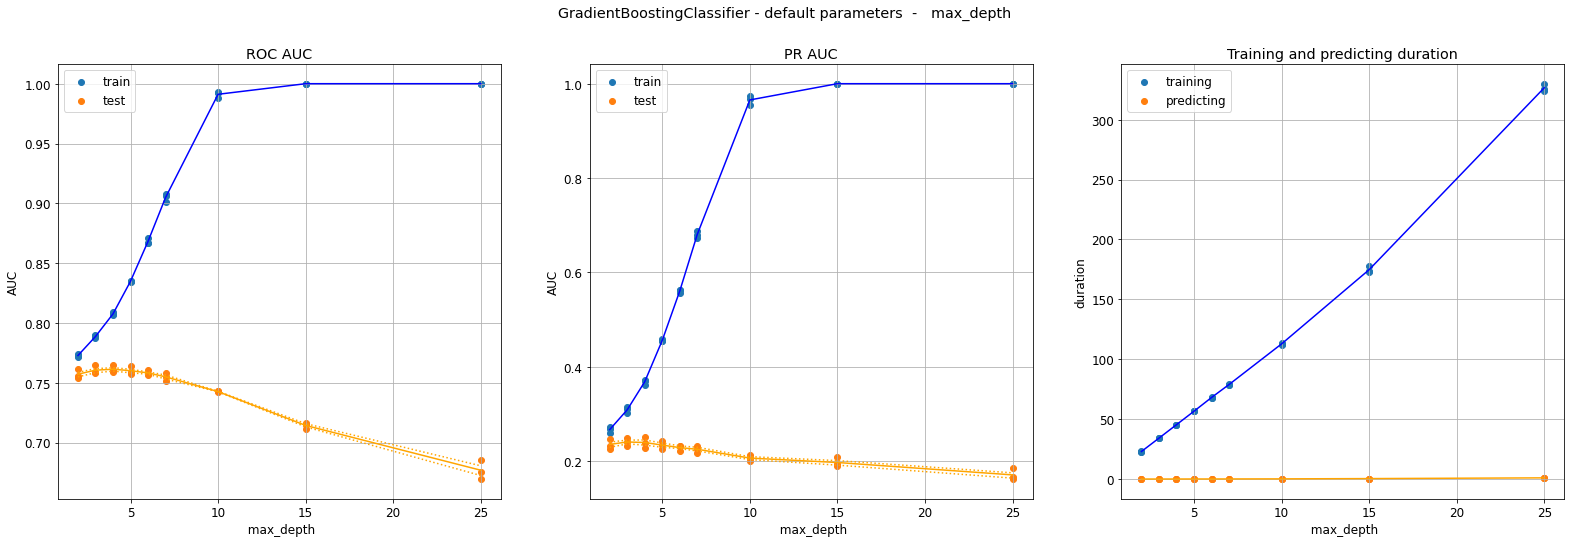

In [36]:
results_tmp = []
lst = [2, 3, 4, 5, 6, 7, 10, 15, 25]
for param_value in lst:
    model = GradientBoostingClassifier(max_depth=param_value)
    title = 'GradientBoostingClassifier - default parameters |  max_depth = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### LGBMClassifier

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

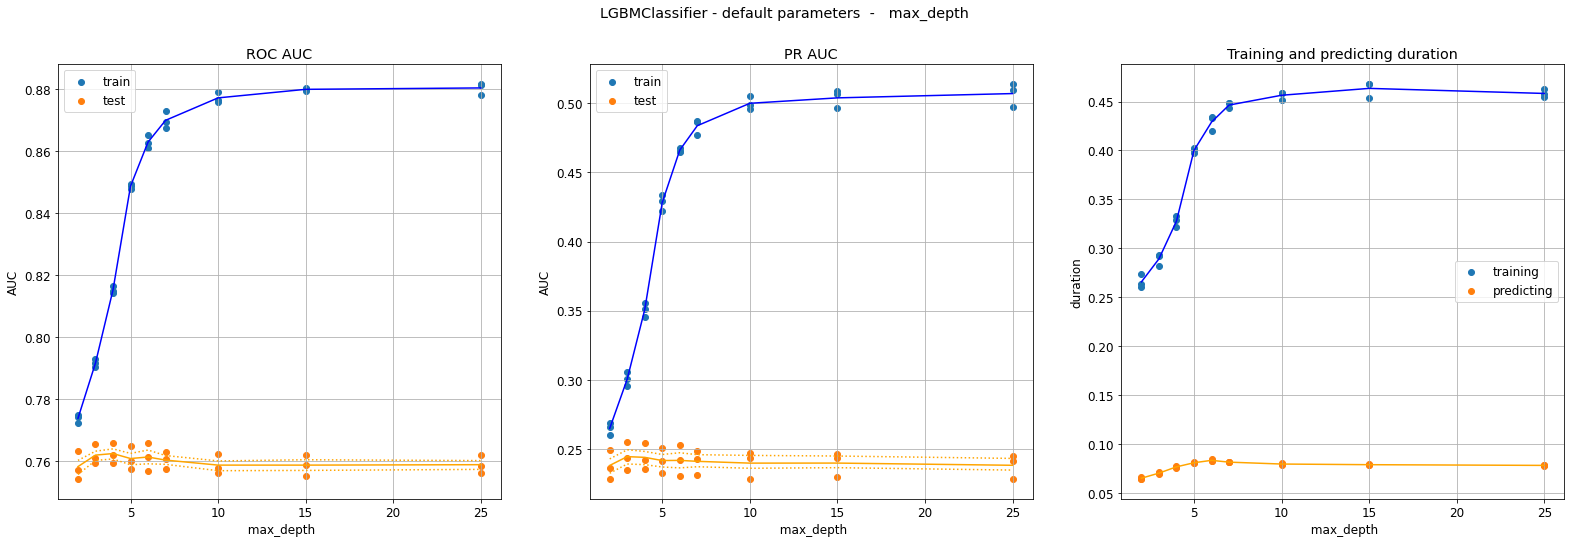

In [37]:
results_tmp = []
lst = [2, 3, 4, 5, 6, 7, 10, 15, 25]
for param_value in lst:
    model = LGBMClassifier(max_depth=param_value, n_jobs=-1)
    title = 'LGBMClassifier - default parameters |  max_depth = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### XG Boost

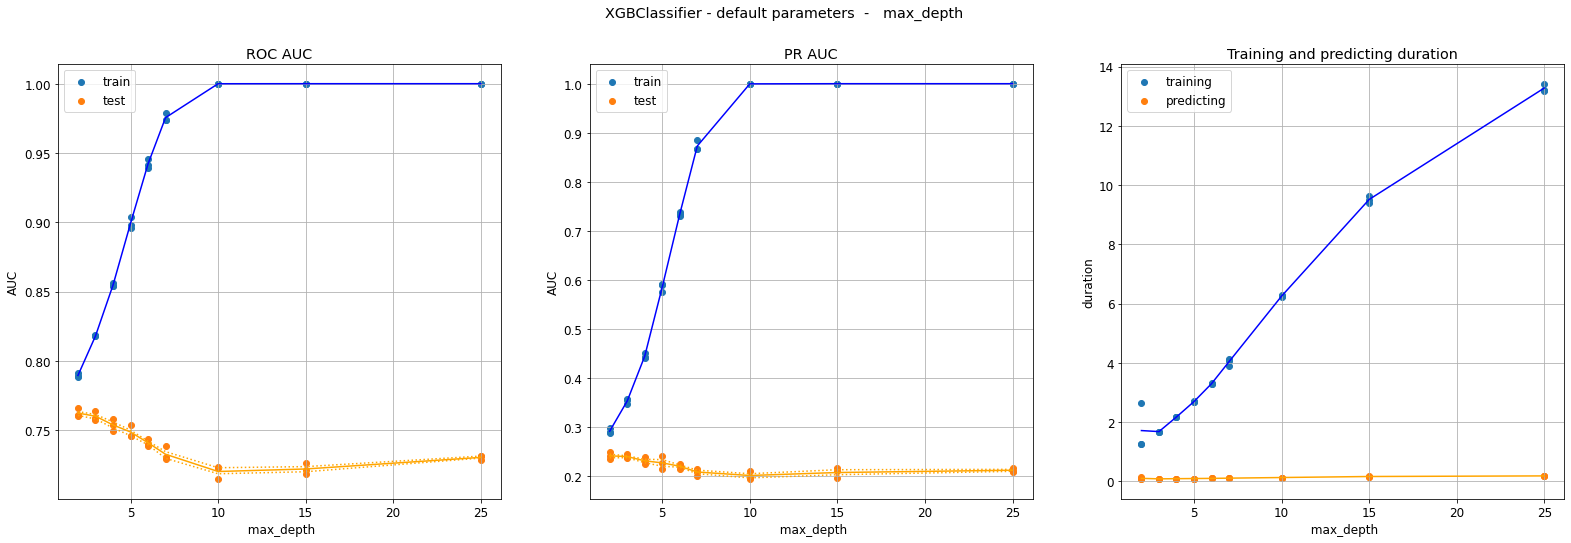

In [39]:
results_tmp = []
lst = [2, 3, 4, 5, 6, 7, 10, 15, 25]
for param_value in lst:
    model = XGBClassifier(max_depth=param_value)
    title = 'XGBClassifier - default parameters |  max_depth = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## learning_rate

### LGBMClassifier

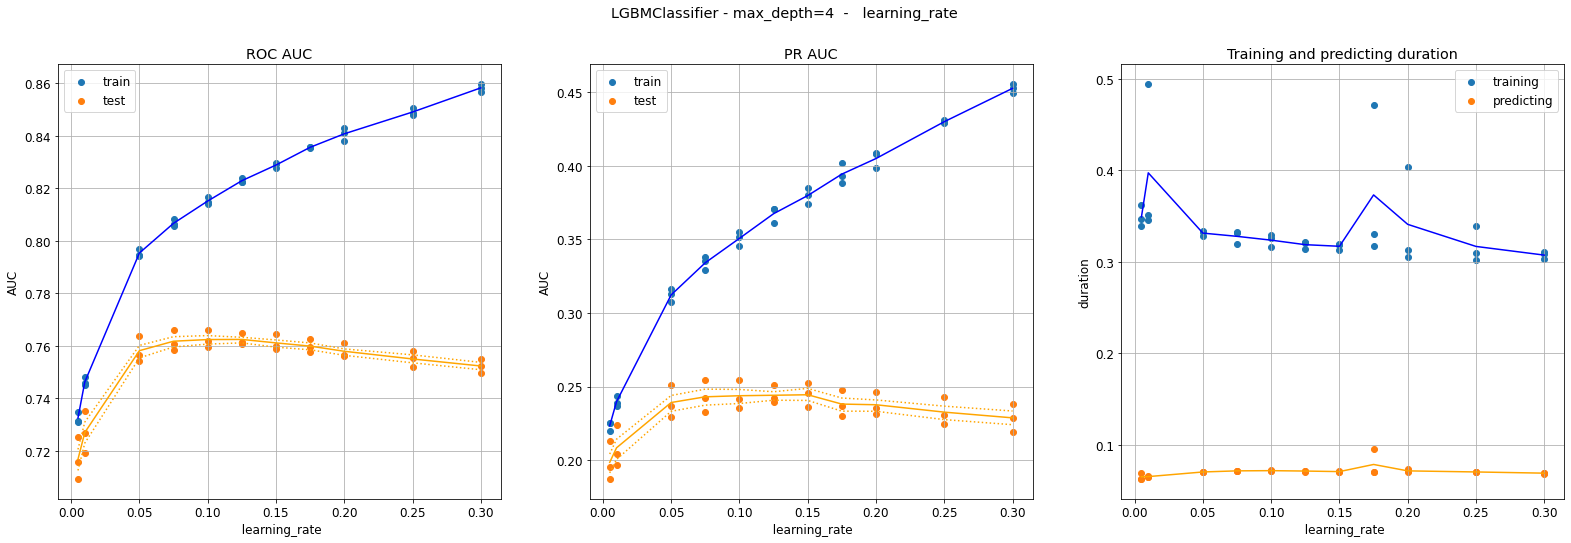

In [41]:
results_tmp = []
lst = [0.005, 0.01, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25, 0.3]
for param_value in lst:
    model = LGBMClassifier(max_depth=4, learning_rate=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4 |  learning_rate = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### XG Boost

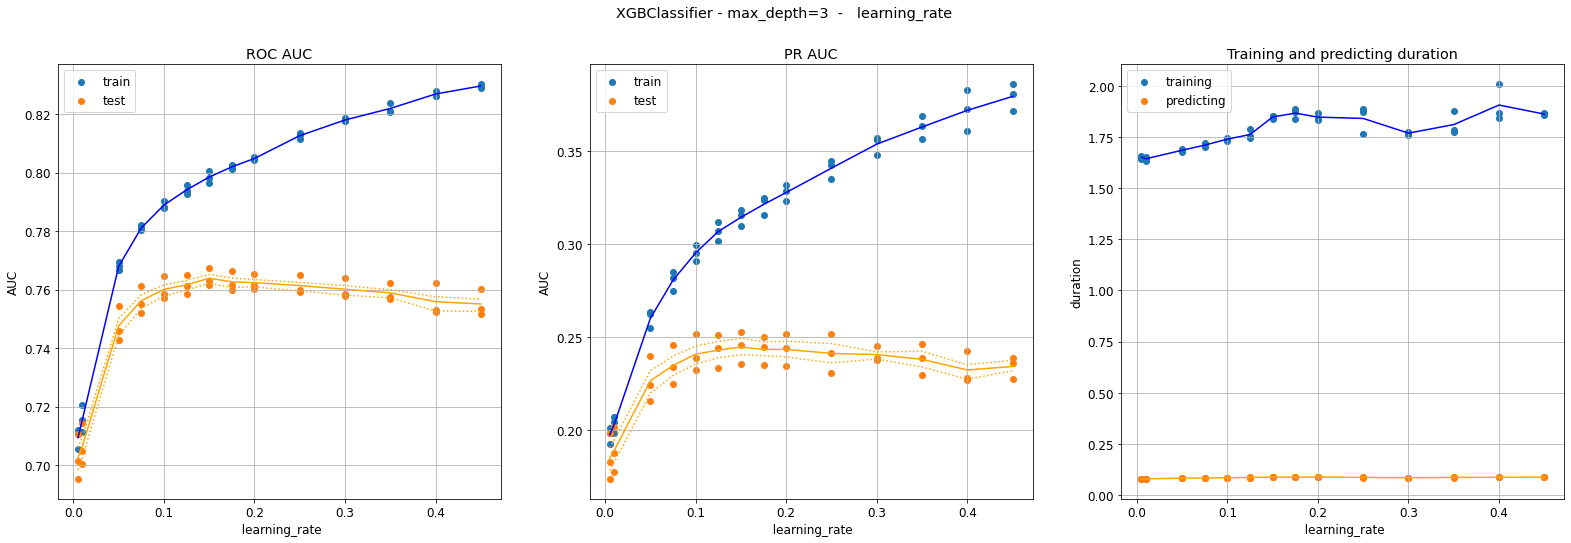

In [42]:
results_tmp = []
lst = [0.005, 0.01, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
for param_value in lst:
    model = XGBClassifier(max_depth=3, learning_rate=param_value)
    title = 'XGBClassifier - max_depth=3 |  learning_rate = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## Specific XGBoost

### gamma

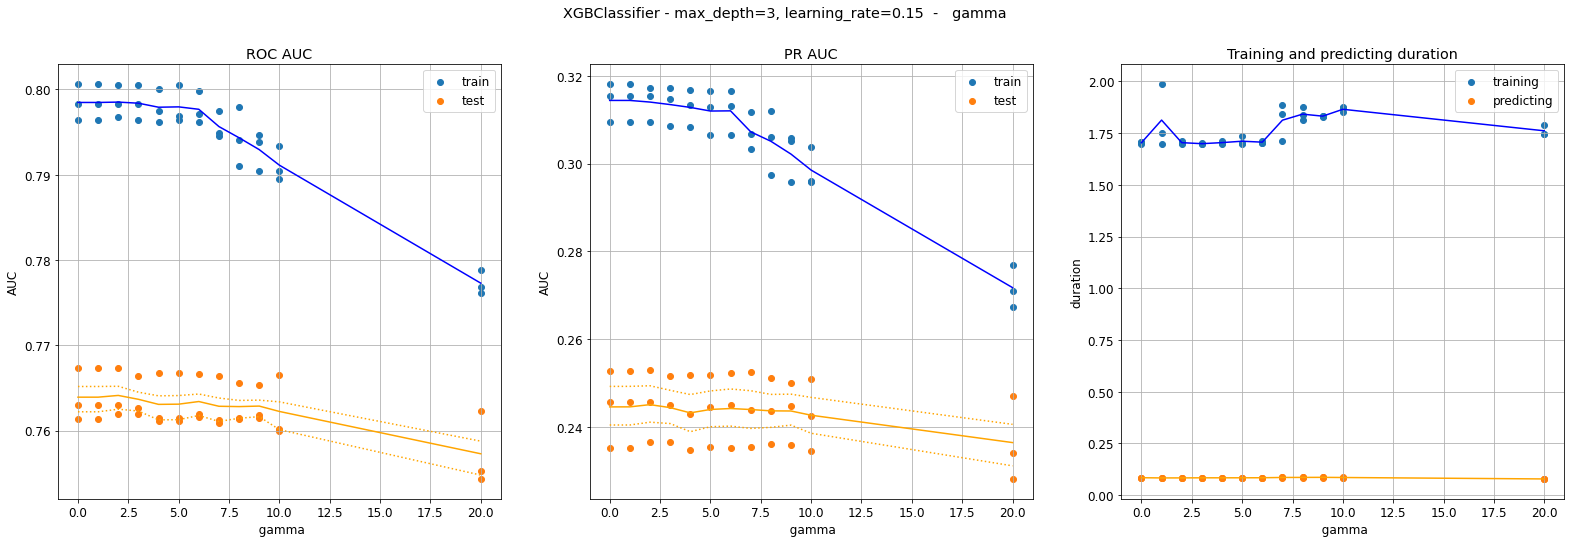

In [44]:
results_tmp = []
lst = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]
for param_value in lst:
    model = XGBClassifier(max_depth=3, learning_rate=0.15, gamma=param_value)
    title = 'XGBClassifier - max_depth=3, learning_rate=0.15 |  gamma = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### min_child_weight

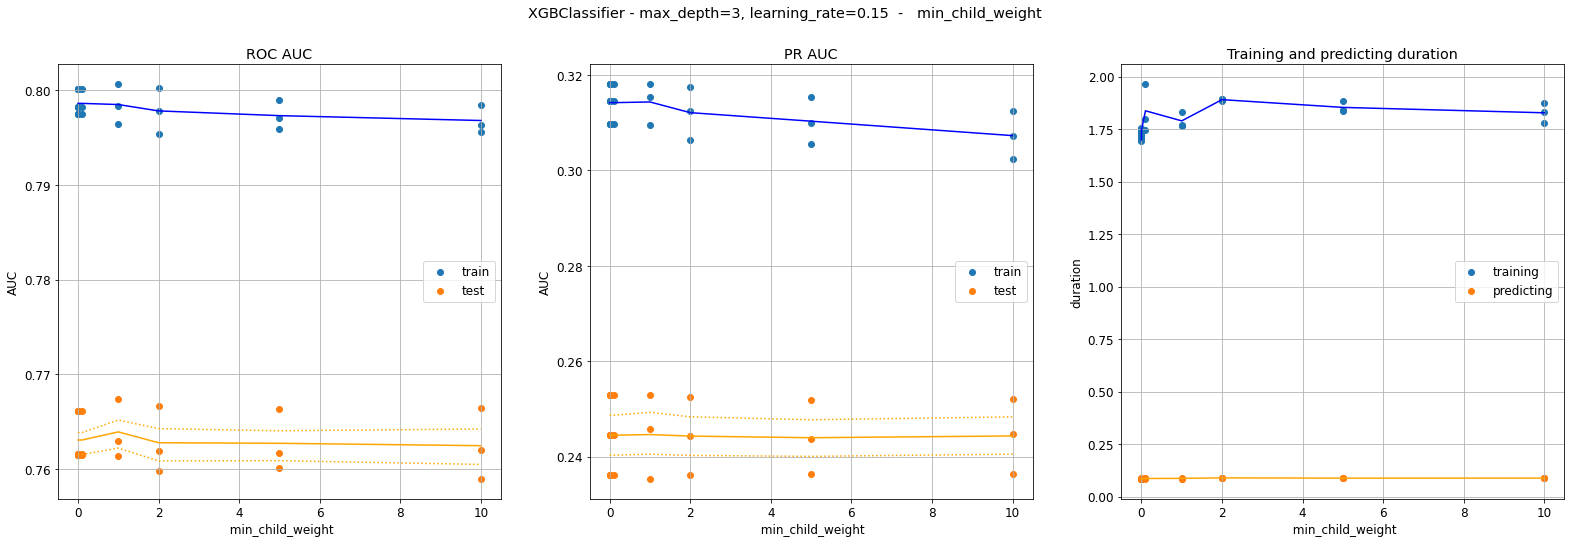

In [45]:
results_tmp = []
lst = [0, 0.00001, 0.0001, 0.001, 0.1, 1, 2, 5, 10]
for param_value in lst:
    model = XGBClassifier(max_depth=3, learning_rate=0.15, min_child_weight=param_value)
    title = 'XGBClassifier - max_depth=3, learning_rate=0.15 |  min_child_weight = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### max_delta_step

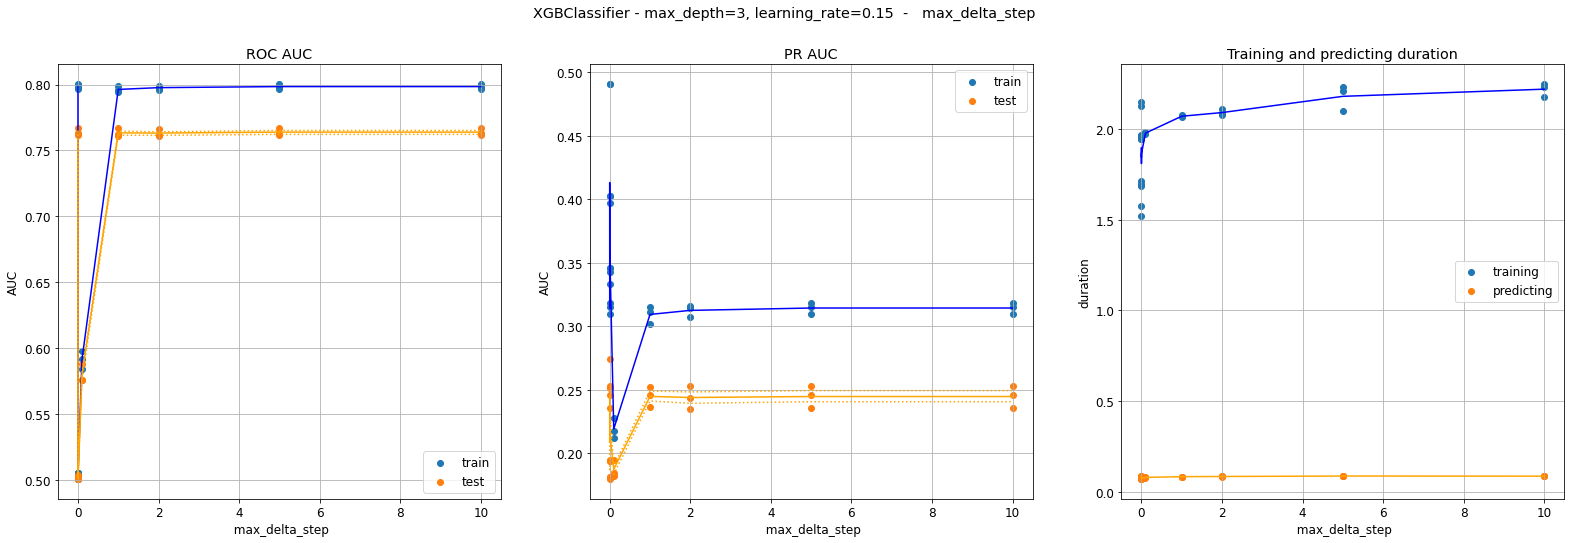

In [46]:
results_tmp = []
lst = [0, 0.00001, 0.0001, 0.001, 0.1, 1, 2, 5, 10]
for param_value in lst:
    model = XGBClassifier(max_depth=3, learning_rate=0.15, max_delta_step=param_value)
    title = 'XGBClassifier - max_depth=3, learning_rate=0.15 |  max_delta_step = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### eval_metric

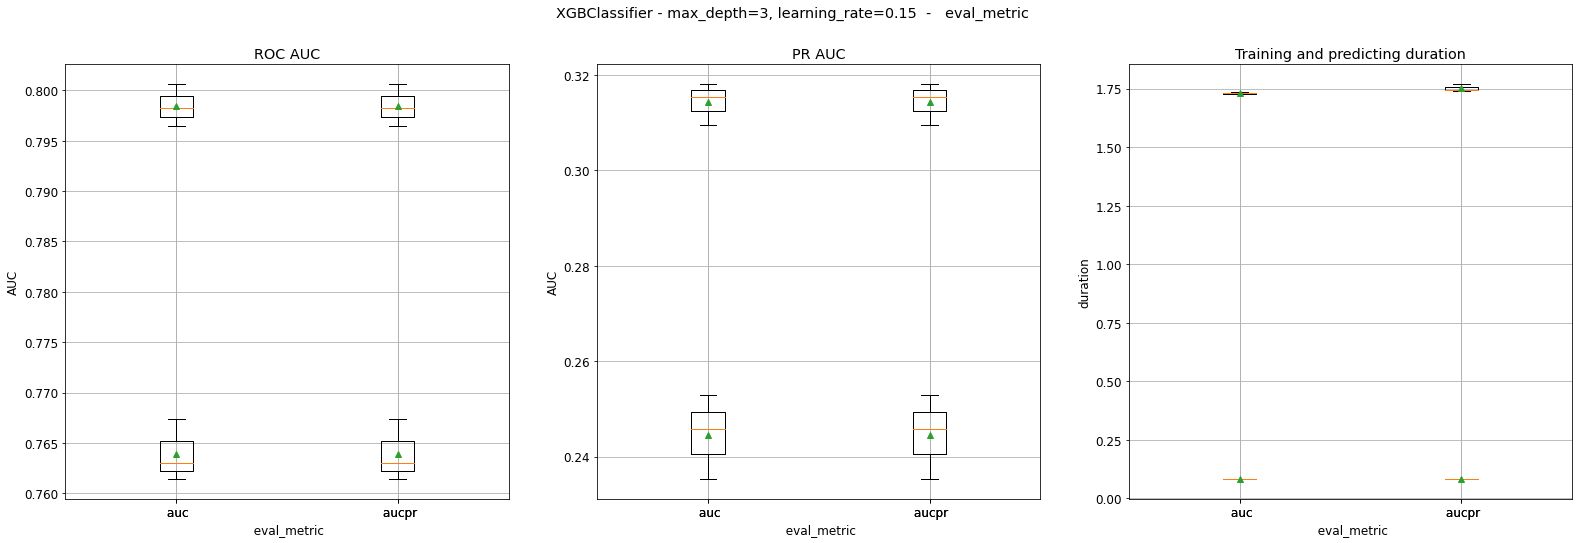

In [47]:
results_tmp = []

model = XGBClassifier(max_depth=3, learning_rate=0.15, eval_metric='auc')
title = 'XGBClassifier - max_depth=3, learning_rate=0.15 |  eval_metric = auc'
res = evaluate(model=model, title = title)
results_tmp.append(res)

model = XGBClassifier(max_depth=3, learning_rate=0.15, eval_metric='aucpr')
title = 'XGBClassifier - max_depth=3, learning_rate=0.15 |  eval_metric = aucpr'
res = evaluate(model=model, title = title)
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

## Specific LGBMClassifier

### num_leaves

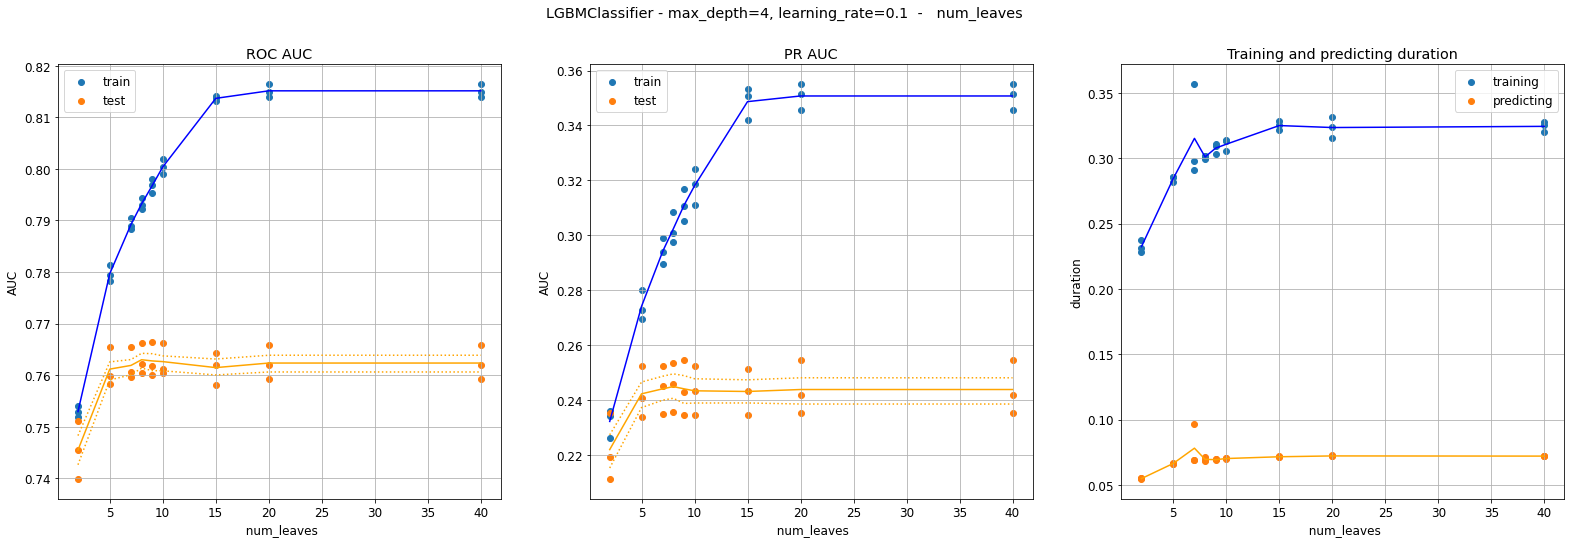

In [51]:
results_tmp = []
lst = [2, 5, 7, 8, 9, 10, 15, 20, 40]
for param_value in lst:
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1 |  num_leaves = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### class_weight

[LightGBM] [Warning] Unknown parameter: class_wight
[LightGBM] [Warning] Unknown parameter: class_wight
[LightGBM] [Warning] Unknown parameter: class_wight


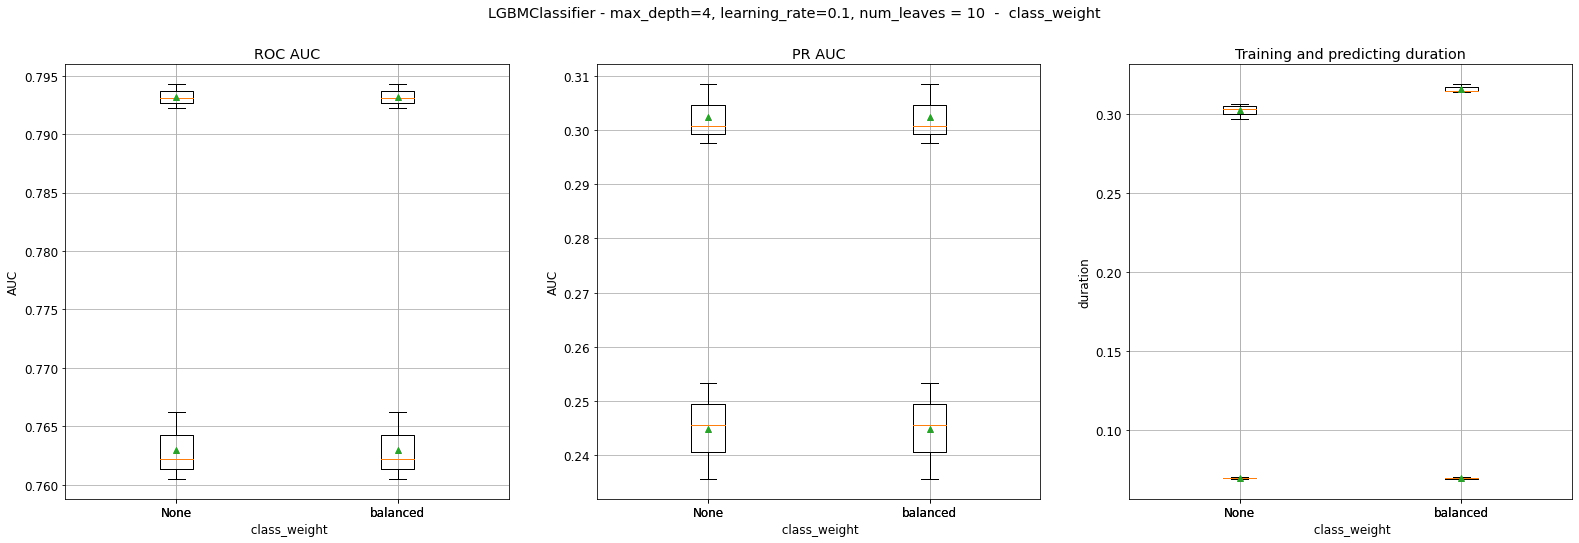

In [50]:
results_tmp = []

model = model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, class_wight=None, n_jobs=-1)
title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves = 10 | class_weight=None'
res = evaluate(model=model, title = title)
results_tmp.append(res)

model = model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, class_wight='balanced', n_jobs=-1)
title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves = 10 | class_weight=balanced'
res = evaluate(model=model, title = title)
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

### min_child_samples

[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown pa

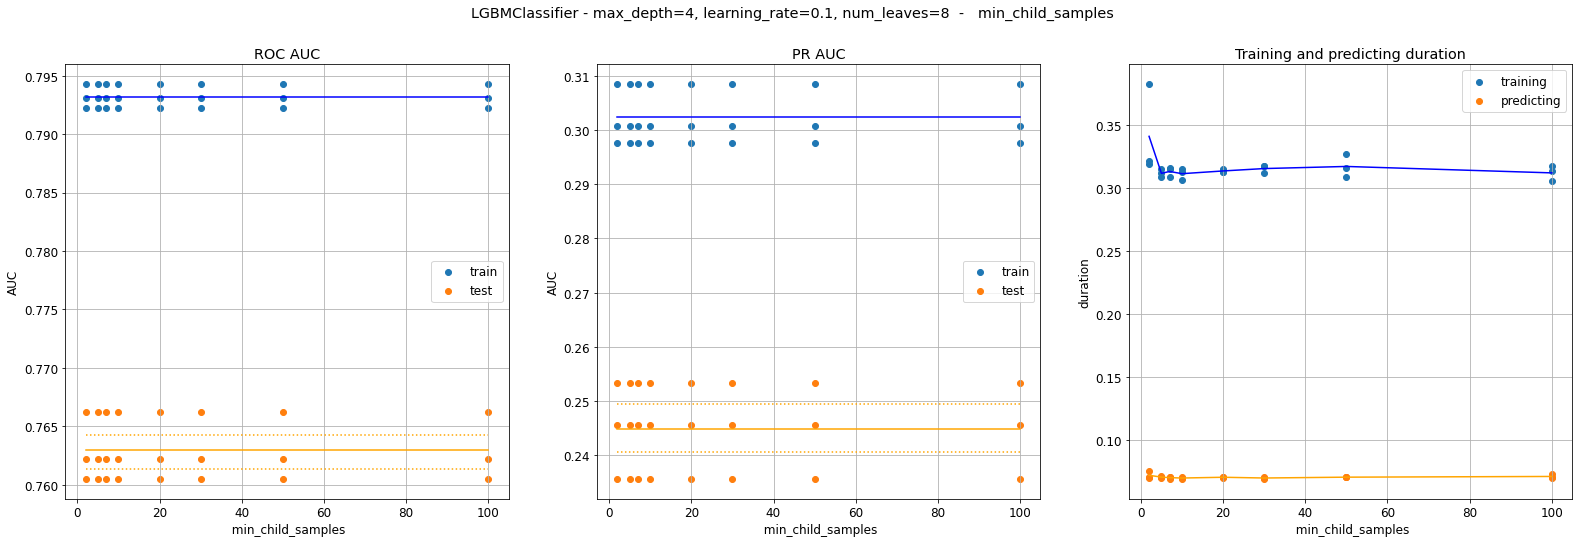

In [52]:
results_tmp = []
lst = [2, 5, 7, 10, 20, 30, 50, 100]
for param_value in lst:
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, min_child_sample =param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves=8 |  min_child_samples = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### subsample_for_bin

In [ ]:
results_tmp = []
lst = [5, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000, 25000, 50000, 75000, 100000, 150000, 200000]
for param_value in lst:
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, subsample_for_bin=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves=8 |  subsample_for_bin = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### min_split_gain

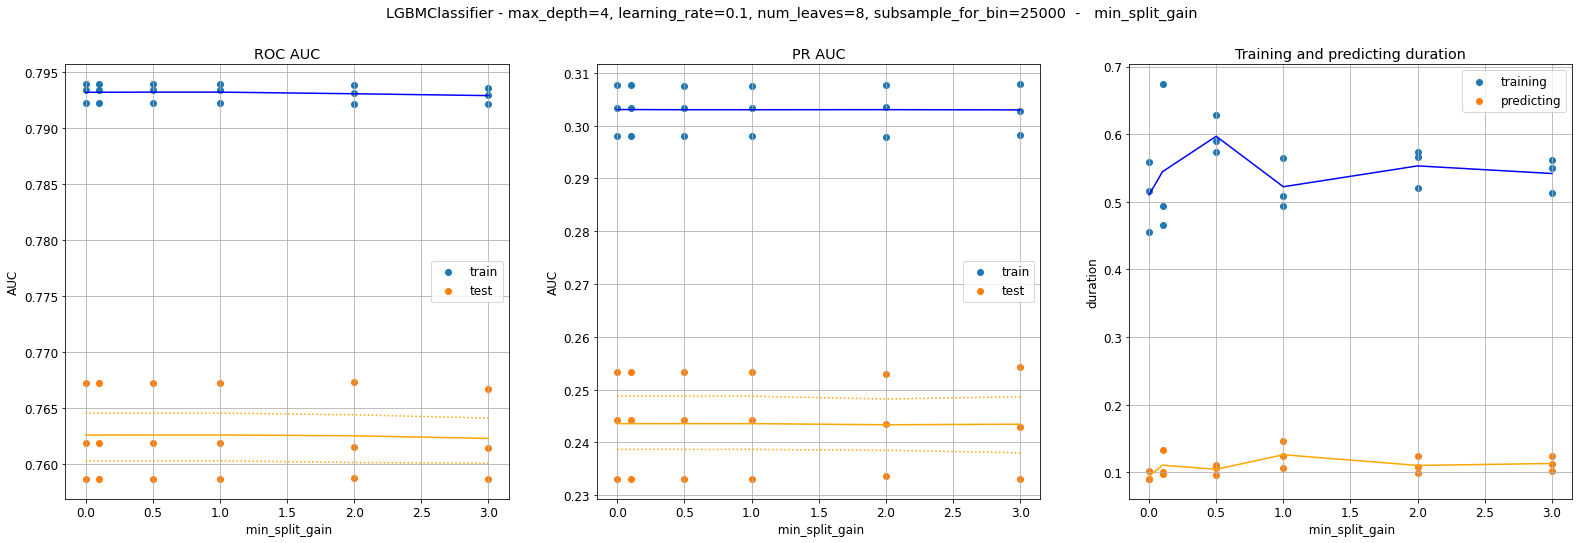

In [7]:
results_tmp = []
lst = [0, 0.1, 0.5, 1, 2, 3]
for param_value in lst:
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, subsample_for_bin=25000, min_split_gain=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves=8, subsample_for_bin=25000 |  min_split_gain = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### min_child_weight

3


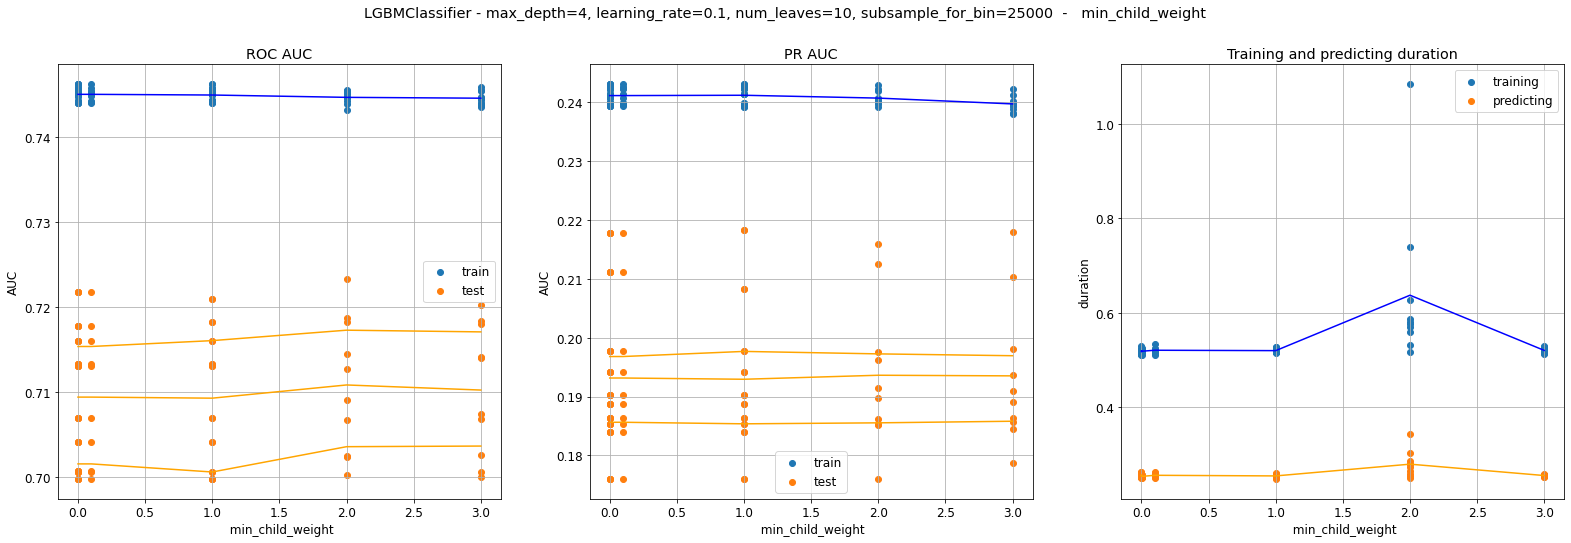

In [47]:
results_tmp = []
lst = [0, 0.00001, 0.0001, 0.001, 0.1, 1, 2, 3]
for param_value in lst:
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, subsample_for_bin=25000, min_child_weight=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves=8, subsample_for_bin=25000 |  min_child_weight = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## n_estimators

### XGBoost

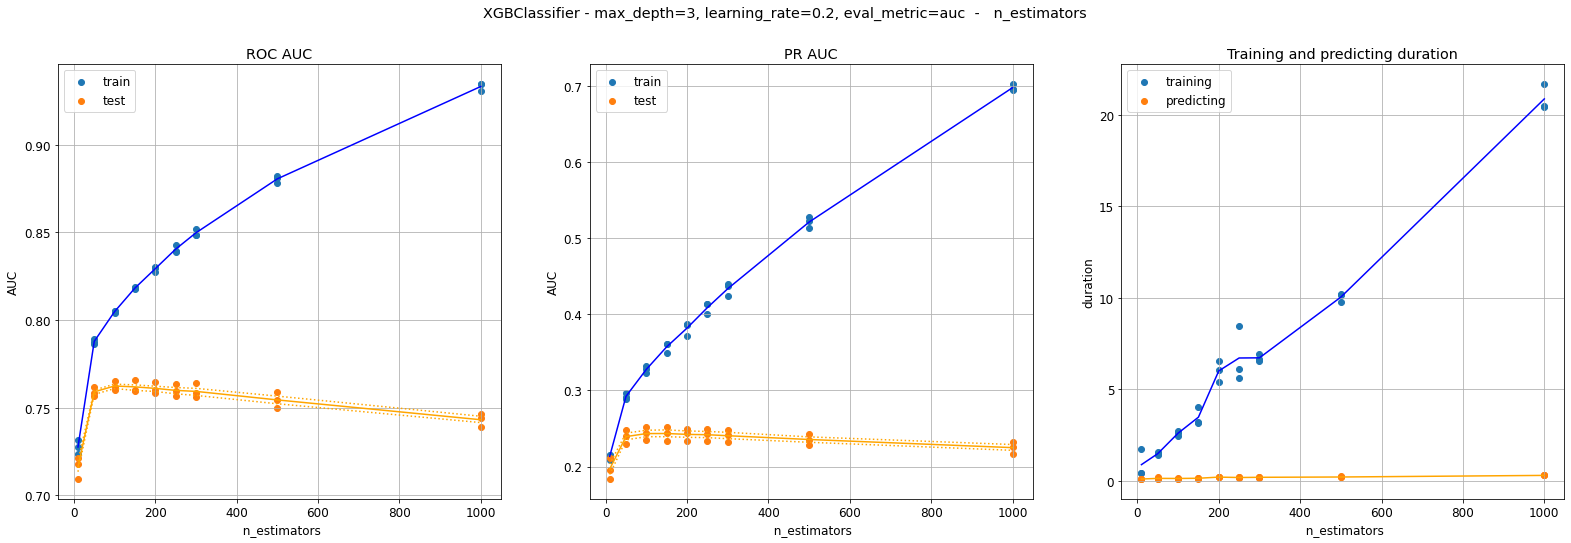

In [8]:
results_tmp = []
lst = [10, 50, 100, 150, 200, 250, 300, 500, 1000]
for param_value in lst:
    model = XGBClassifier(max_depth=3, learning_rate=0.2, eval_metric='auc', n_estimators=param_value)
    title = 'XGBClassifier - max_depth=3, learning_rate=0.2, eval_metric=auc |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### LGBMClassifier

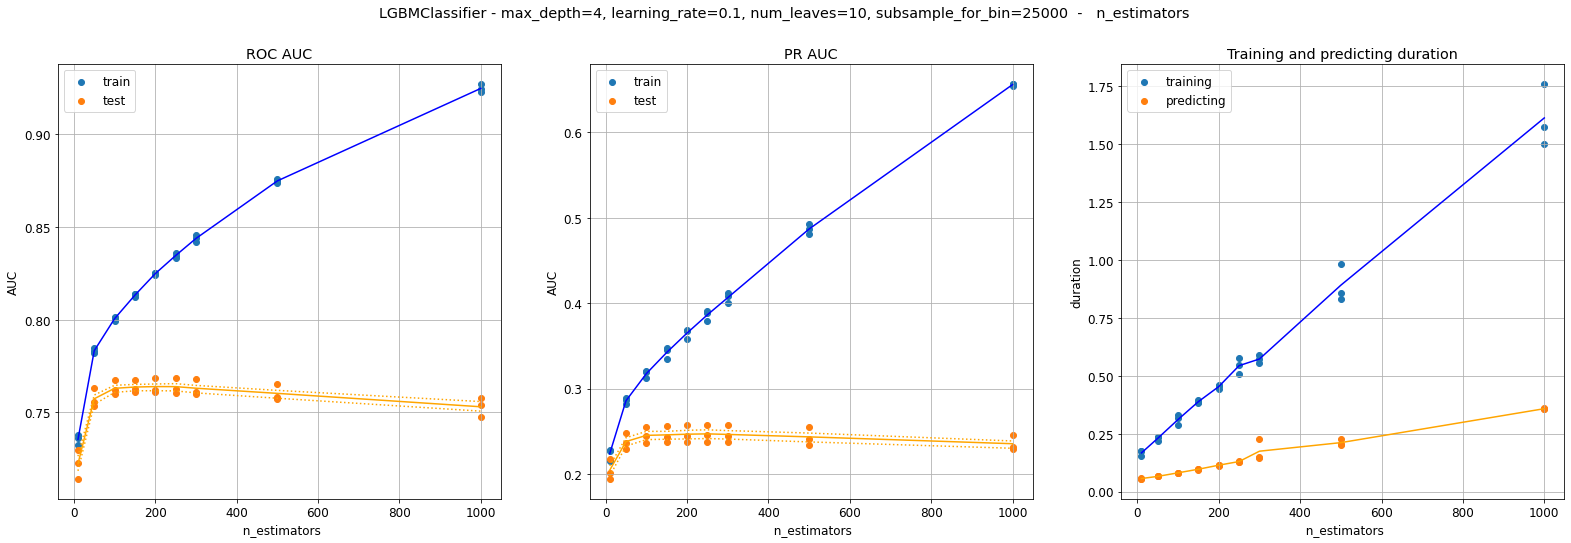

In [9]:
results_tmp = []
lst = [10, 50, 100, 150, 200, 250, 300, 500, 1000]
for param_value in lst:
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000, n_estimators=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000 |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### Métriques finales Gradient Boosting

In [10]:
bestmetricsGB = []

model = XGBClassifier(max_depth=3, learning_rate=0.15, eval_metric='auc', n_estimators=100)
title = 'XGBClassifier'
bestmetricsGB.append(evaluate(model, title))
         
model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, subsample_for_bin=25000, n_estimators=150, n_jobs=-1)
title = 'LGBMClassifier'
bestmetricsGB.append(evaluate(model, title))
         
pd.concat(bestmetricsGB).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

,title,roc_auc_train,roc_auc_test,pr_auc_train,pr_auc_test,time_train,time_pred,nb_feat,nb_train,timestamp
0,XGBClassifier,0.798466,0.763915,0.314362,0.244624,1.989530,0.107569,50.0,66666.666667,1.625572e+09
1,LGBMClassifier,0.804075,0.763513,0.324286,0.244653,0.403363,0.091967,50.0,66666.666667,1.625572e+09


# EasyEnsembleClassifier

## sampling_strategy

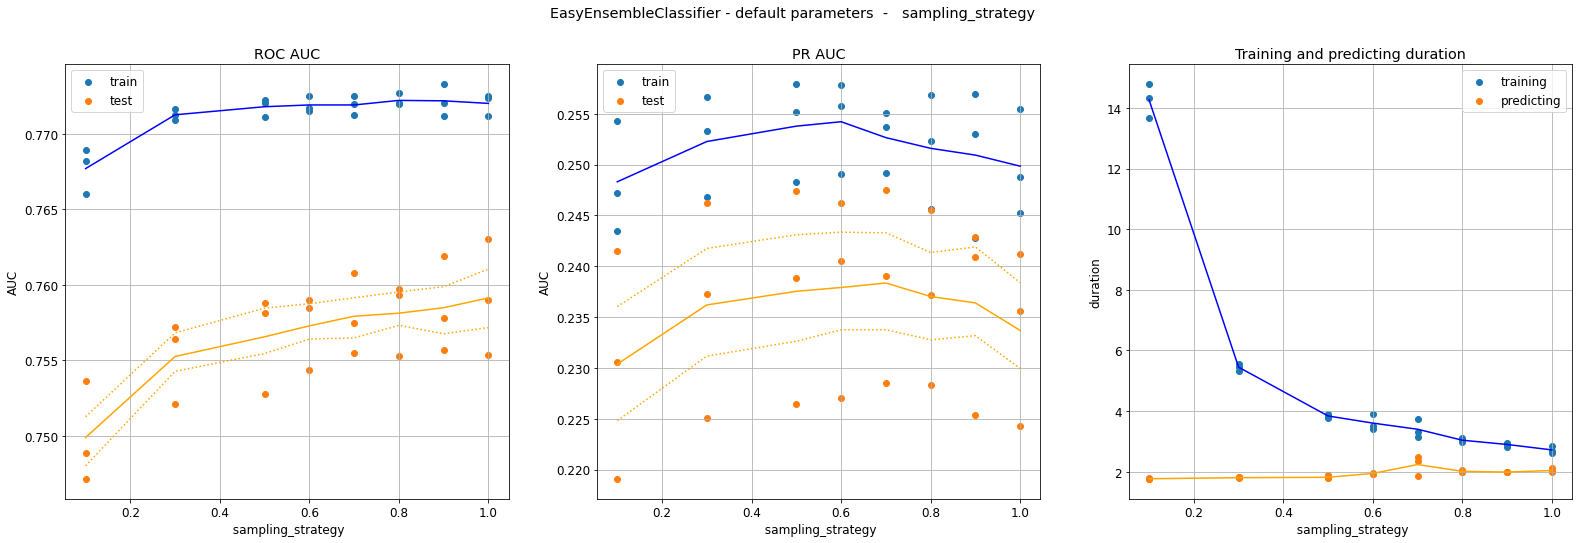

In [16]:
results_tmp = []
lst = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for param_value in lst:
    model = EasyEnsembleClassifier(sampling_strategy=param_value, n_jobs=-1)
    title = 'EasyEnsembleClassifier - default parameters |  sampling_strategy = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## base_estimator

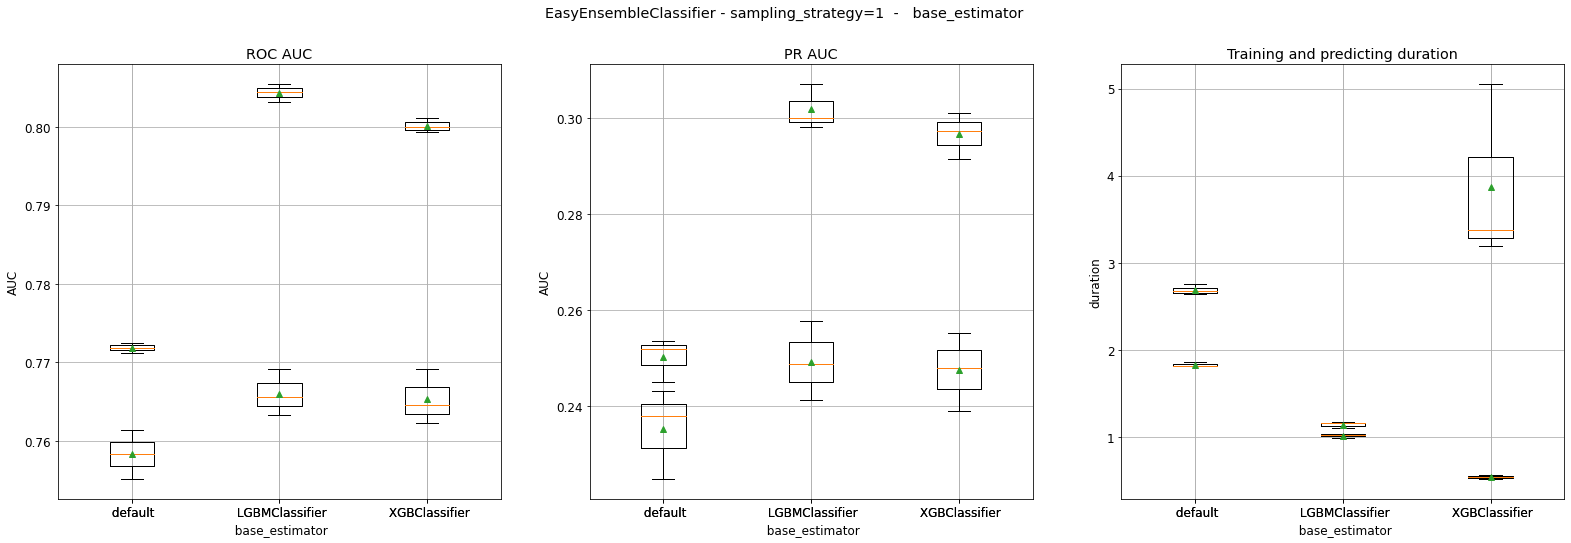

In [18]:
results_tmp = []

model = EasyEnsembleClassifier(sampling_strategy=0.8, n_jobs=-1)
title = 'EasyEnsembleClassifier - sampling_strategy=1 |  base_estimator = default'
res = evaluate(model=model, title = title)
results_tmp.append(res)

model = EasyEnsembleClassifier(sampling_strategy=0.8, base_estimator=LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, subsample_for_bin=25000, n_estimators=150, n_jobs=-1), n_jobs=-1)
title = 'EasyEnsembleClassifier - sampling_strategy=1 |  base_estimator = LGBMClassifier'
res = evaluate(model=model, title = title)
results_tmp.append(res)

model = EasyEnsembleClassifier(sampling_strategy=0.8, base_estimator=XGBClassifier(max_depth=3, learning_rate=0.15, eval_metric='auc', n_estimators=100), n_jobs=-1)
title = 'EasyEnsembleClassifier - sampling_strategy=1 |  base_estimator = XGBClassifier'
res = evaluate(model=model, title = title)
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

## replacement

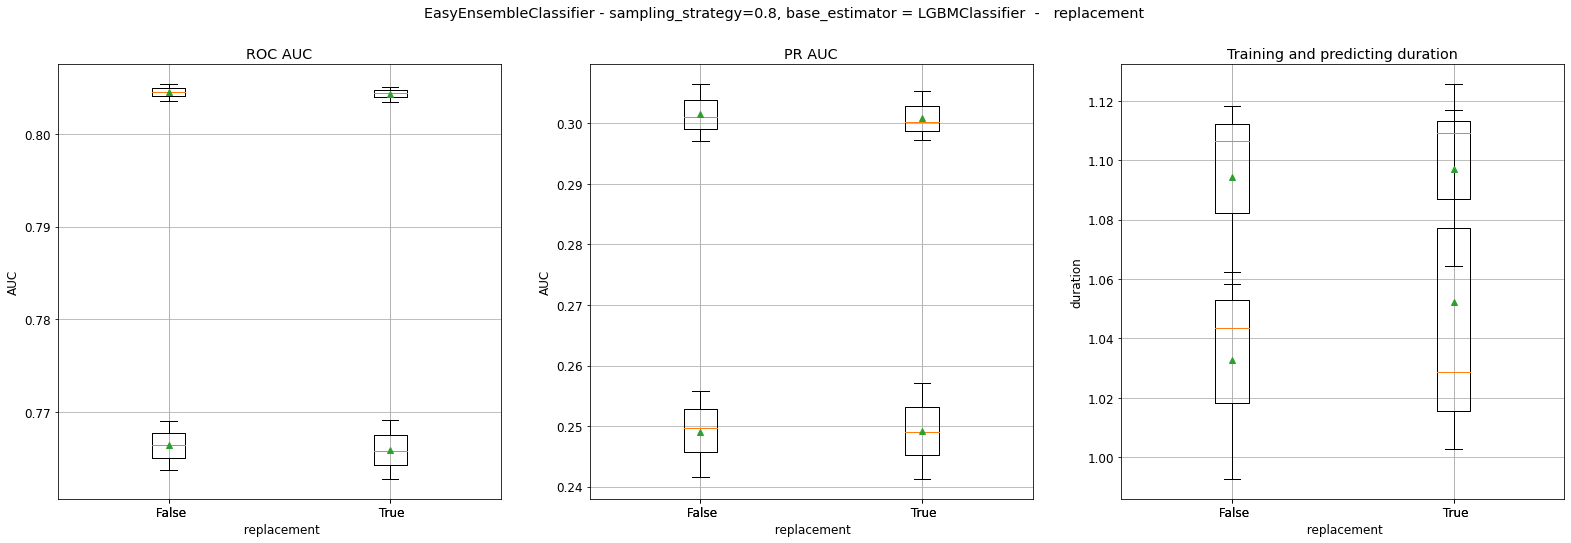

In [19]:
results_tmp = []

base_estimator=LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, subsample_for_bin=25000, n_estimators=150, n_jobs=-1)

model = EasyEnsembleClassifier(sampling_strategy=0.8, base_estimator=base_estimator, replacement=False, n_jobs=-1)
title = 'EasyEnsembleClassifier - sampling_strategy=0.8, base_estimator = LGBMClassifier |  replacement = False'
res = evaluate(model=model, title = title)
results_tmp.append(res)

model = EasyEnsembleClassifier(sampling_strategy=0.8, base_estimator=base_estimator, replacement=True, n_jobs=-1)
title = 'EasyEnsembleClassifier - sampling_strategy=0.8, base_estimator = LGBMClassifier |  replacement = True'
res = evaluate(model=model, title = title)
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

## warm_start

/home/pierre/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:353: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/home/pierre/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:353: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


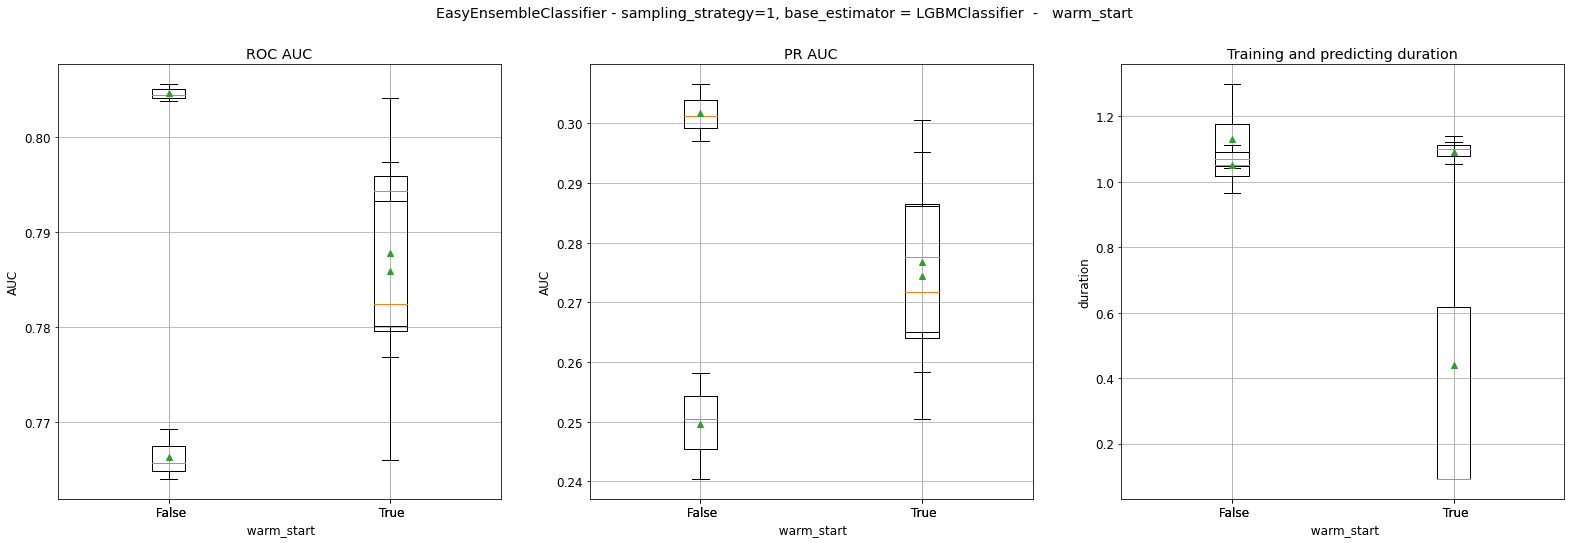

In [20]:
results_tmp = []

base_estimator=LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, subsample_for_bin=25000, n_estimators=150, n_jobs=-1)

model = EasyEnsembleClassifier(sampling_strategy=0.8, base_estimator=base_estimator, warm_start=False, n_jobs=-1)
title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  warm_start = False'
res = evaluate(model=model, title = title)
results_tmp.append(res)

model = EasyEnsembleClassifier(sampling_strategy=0.8, base_estimator=base_estimator, warm_start=True, n_jobs=-1)
title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  warm_start = True'
res = evaluate(model=model, title = title)
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

## n_estimators

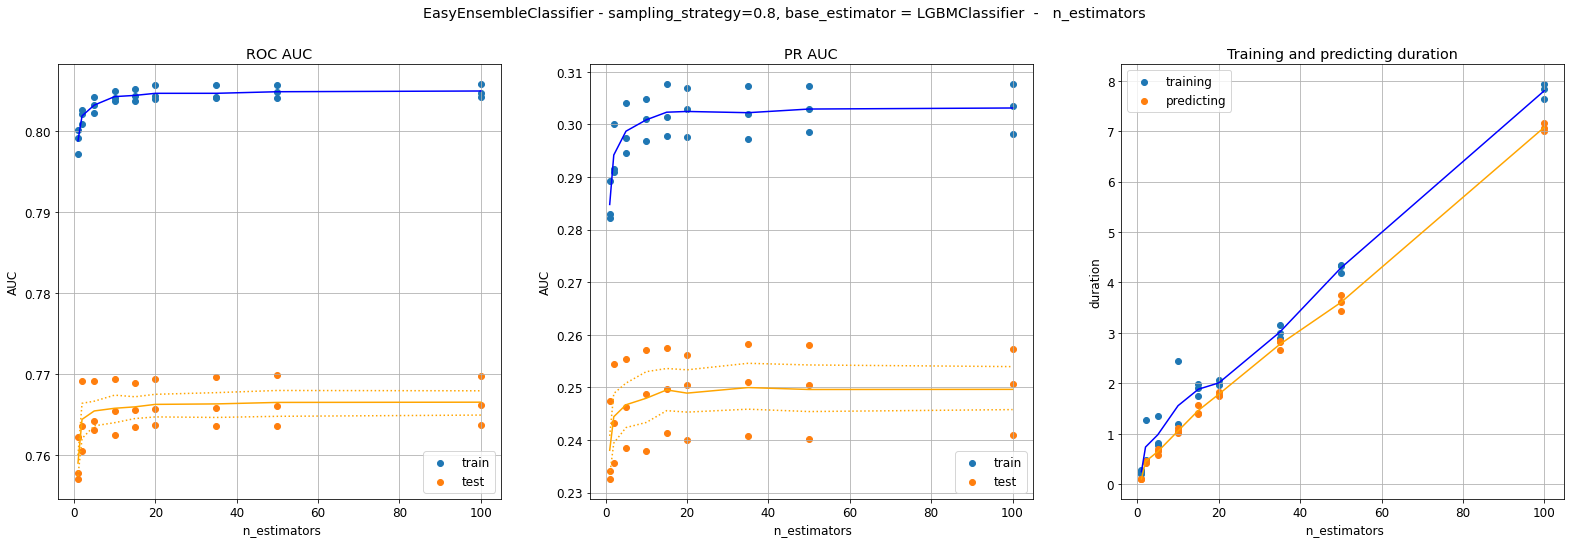

In [23]:
results_tmp = []
lst = [1, 2, 5, 10, 15, 20, 35, 50, 100]
base_estimator=LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, subsample_for_bin=25000, n_estimators=150, n_jobs=-1)
for param_value in lst:
    model = EasyEnsembleClassifier(sampling_strategy=0.8, base_estimator=base_estimator, n_estimators=param_value, n_jobs=-1)
    title = 'EasyEnsembleClassifier - sampling_strategy=0.8, base_estimator = LGBMClassifier |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

# Bilan des métriques

In [26]:
# à tester: CatBoost

bestmetrics = []

model = RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=25000, max_leaf_nodes=150, n_estimators=200, n_jobs=-1)
title = 'sklearn random forest'
bestmetrics.append(evaluate(model, title))
         
model = BalancedRandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=10, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=25000, max_leaf_nodes=150, n_estimators=200, n_jobs=-1)
title = 'imbalanced random forest'
bestmetrics.append(evaluate(model, title))

model = XGBClassifier(max_depth=3, learning_rate=0.15, eval_metric='auc', n_estimators=100)
title = 'XGBClassifier'
bestmetrics.append(evaluate(model, title))
         
model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, subsample_for_bin=25000, n_estimators=150, n_jobs=-1)
title = 'LGBMClassifier'
bestmetrics.append(evaluate(model, title))

base_estimator = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, subsample_for_bin=25000, n_estimators=150, n_jobs=-1)
model = EasyEnsembleClassifier(sampling_strategy=0.8, base_estimator=base_estimator, n_estimators=20, n_jobs=-1)
title = 'EasyEnsembleClassifier with LGBMClassifier'
res = evaluate(model=model, title = title)
bestmetrics.append(res)

         
pd.concat(bestmetrics).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

,title,roc_auc_train,roc_auc_test,pr_auc_train,pr_auc_test,time_train,time_pred,nb_feat,nb_train,timestamp
0,sklearn random forest,0.794028,0.749118,0.271806,0.222699,2.281158,0.199845,50.0,66666.666667,1.625574e+09
1,imbalanced random forest,0.829057,0.743332,0.313544,0.220746,2.627777,0.203276,50.0,66666.666667,1.625574e+09
2,XGBClassifier,0.798466,0.763915,0.314362,0.244624,1.897064,0.130593,50.0,66666.666667,1.625574e+09
3,LGBMClassifier,0.804075,0.763513,0.324286,0.244653,0.388197,0.103558,50.0,66666.666667,1.625574e+09
4,EasyEnsembleClassifier with LGBMClassifier,0.804463,0.766398,0.302857,0.249272,2.035068,1.791588,50.0,66666.666667,1.625574e+09
